In [5]:
import csv
import math
import pandas as pd

# read in data  

caleb_mth1_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_WardleCaleb_1152712_25Jan2025_2111.csv")
caleb_mth2_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_WardleCaleb_1152712_25Jan2025_2133.csv")
print(caleb_mth1_df.head()) #see what it looks like
print(caleb_mth1_df.dtypes)

  DeviceType  SerialNumber Description        EventDateTime  Readings (mg/dL)
0  t:slim X2       1152712         EGV  2024-11-20T00:04:55               267
1  t:slim X2       1152712         EGV  2024-11-20T00:09:55               261
2  t:slim X2       1152712         EGV  2024-11-20T00:14:55               256
3  t:slim X2       1152712         EGV  2024-11-20T00:19:55               250
4  t:slim X2       1152712         EGV  2024-11-20T00:24:56               240
DeviceType          object
SerialNumber         int64
Description         object
EventDateTime       object
Readings (mg/dL)     int64
dtype: object


In [6]:
caleb_all_df = pd.concat([caleb_mth1_df, caleb_mth2_df], ignore_index=True)
print(caleb_all_df)

      DeviceType  SerialNumber Description        EventDateTime  \
0      t:slim X2       1152712         EGV  2024-11-20T00:04:55   
1      t:slim X2       1152712         EGV  2024-11-20T00:09:55   
2      t:slim X2       1152712         EGV  2024-11-20T00:14:55   
3      t:slim X2       1152712         EGV  2024-11-20T00:19:55   
4      t:slim X2       1152712         EGV  2024-11-20T00:24:56   
...          ...           ...         ...                  ...   
16764  t:slim X2       1152712          BG  2025-01-15T13:34:39   
16765  t:slim X2       1152712          BG  2025-01-15T16:14:36   
16766  t:slim X2       1152712          BG  2025-01-15T19:51:22   
16767  t:slim X2       1152712          BG  2025-01-15T22:20:10   
16768  t:slim X2       1152712          BG  2025-01-16T18:44:27   

       Readings (mg/dL)  
0                   267  
1                   261  
2                   256  
3                   250  
4                   240  
...                 ...  
16764        

In [7]:
# read in pump events data
caleb_mth1_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/CalebWardle_pump_events1_25Jan2025.csv")
caleb_mth2_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/CalebWardle_pump_events2_25Jan2025.csv")
caleb_events_all_df = pd.concat([caleb_mth1_events_df, caleb_mth2_events_df], ignore_index=True)


In [8]:
print(caleb_events_all_df.head()) #see what it looks like

    Type BolusType BolusDeliveryMethod  BG (mg/dL)  SerialNumber  \
0  Bolus      Auto                Auto         299       1152712   
1  Bolus  Override            Standard         258       1152712   
2  Bolus      Auto                Auto         290       1152712   
3  Bolus  Override            Standard         230       1152712   
4  Bolus      Auto                Auto         231       1152712   

    CompletionDateTime  InsulinDelivered  FoodDelivered  CorrectionDelivered  \
0  2024-11-20T06:47:42              5.00            0.0                  0.0   
1  2024-11-20T07:50:31              5.00            0.0                  0.0   
2  2024-11-20T12:48:50              5.69            0.0                  0.0   
3  2024-11-20T13:00:44              3.00            0.0                  0.0   
4  2024-11-20T14:08:46              0.96            0.0                  0.0   

  CompletionStatusDesc BolexStartDateTime BolexCompletionDateTime  \
0            Completed                NaN

In [153]:
#see the data types
print(caleb_events_all_df.dtypes)

Type                          object
BolusType                     object
BolusDeliveryMethod           object
BG (mg/dL)                     int64
SerialNumber                   int64
CompletionDateTime            object
InsulinDelivered             float64
FoodDelivered                float64
CorrectionDelivered          float64
CompletionStatusDesc          object
BolexStartDateTime            object
BolexCompletionDateTime       object
BolexInsulinDelivered        float64
BolexCompletionStatusDesc     object
StandardPercent                int64
Duration (mins)                int64
CarbSize                       int64
TargetBG (mg/dL)               int64
CorrectionFactor               int64
CarbRatio                    float64
dtype: object


In [9]:
caleb_all_df[['EventDate', 'EventTime']] = caleb_all_df['EventDateTime'].str.split('T', expand=True)

caleb_all_df = caleb_all_df.drop(columns=['EventDateTime'])

In [10]:
caleb_events_all_df[['EventDate', 'EventTime']] = caleb_events_all_df['CompletionDateTime'].str.split('T', expand=True)

caleb_events_all_df = caleb_events_all_df.drop(columns=['CompletionDateTime'])


In [11]:
caleb_all_df = caleb_all_df.rename(columns={'Readings (mg/dL)': 'BG'})

In [12]:
caleb_all_df = caleb_all_df.drop(columns=['DeviceType','SerialNumber'])

In [13]:
caleb_events_all_df = caleb_events_all_df.rename(columns={'BG (mg/dL)': 'BGEvent', 'TargetBG (mg/dL)' : 'Target'} )

In [14]:
caleb_events_all_df = caleb_events_all_df.drop(columns=['BolexStartDateTime','SerialNumber','BolexCompletionDateTime','BolexInsulinDelivered',
                                                       'BolexCompletionStatusDesc','StandardPercent','Duration (mins)'])

In [15]:
caleb_all_df['EventDate'] = pd.to_datetime(caleb_all_df['EventDate']) 
caleb_all_df['EventTime'] = pd.to_datetime(caleb_all_df['EventTime'], format='%H:%M:%S')

In [16]:
caleb_events_all_df['EventDate'] = pd.to_datetime(caleb_events_all_df['EventDate']) 
caleb_events_all_df['EventTime'] = pd.to_datetime(caleb_events_all_df['EventTime'], format='%H:%M:%S')

In [17]:
caleb_all_df['RoundedTime'] = caleb_all_df['EventTime'].dt.floor('5min')
caleb_events_all_df['RoundedTime'] = caleb_events_all_df['EventTime'].dt.floor('5min')
caleb_all_df = caleb_all_df.drop(columns=['EventTime'])
caleb_events_all_df = caleb_events_all_df.drop(columns=['EventTime'])

In [163]:

caleb_events_all_df.to_csv("caleb_events_all_df.csv", index=False)

In [164]:
print(caleb_all_df.head())

  Description   BG  EventDate         RoundedTime
0         EGV  267 2024-11-20 1900-01-01 00:00:00
1         EGV  261 2024-11-20 1900-01-01 00:05:00
2         EGV  256 2024-11-20 1900-01-01 00:10:00
3         EGV  250 2024-11-20 1900-01-01 00:15:00
4         EGV  240 2024-11-20 1900-01-01 00:20:00


In [165]:
print(caleb_events_all_df.head())

    Type BolusType BolusDeliveryMethod  BGEvent  InsulinDelivered  \
0  Bolus      Auto                Auto      299              5.00   
1  Bolus  Override            Standard      258              5.00   
2  Bolus      Auto                Auto      290              5.69   
3  Bolus  Override            Standard      230              3.00   
4  Bolus      Auto                Auto      231              0.96   

   FoodDelivered  CorrectionDelivered CompletionStatusDesc  CarbSize  Target  \
0            0.0                  0.0            Completed         0     110   
1            0.0                  0.0            Completed         0     110   
2            0.0                  0.0            Completed         0     110   
3            0.0                  0.0            Completed         0     110   
4            0.0                  0.0            Completed         0     110   

   CorrectionFactor  CarbRatio  EventDate         RoundedTime  
0                22        0.0 2024-11-2

In [18]:
caleb_merged_df = caleb_all_df.merge(caleb_events_all_df, on=['EventDate', 'RoundedTime'],  #merge on these two common columns
    how='left'  #keep all rows from caleb_all_df
)

In [19]:
# Sort by EventDate, RoundedTime, Description (ascending), and Type (descending)
caleb_merged_df = caleb_merged_df.sort_values(
    by=['EventDate', 'RoundedTime', 'Type'], 
    ascending=[True, True, False]
)

# Drop duplicates while keeping the first occurrence in the sorted order
caleb_merged_df = caleb_merged_df.drop_duplicates(
    subset=['EventDate', 'RoundedTime'], 
    keep='first'
)

# Display the deduplicated dataframe
print(caleb_merged_df.head())


  Description   BG  EventDate         RoundedTime Type BolusType  \
0         EGV  267 2024-11-20 1900-01-01 00:00:00  NaN       NaN   
1         EGV  261 2024-11-20 1900-01-01 00:05:00  NaN       NaN   
2         EGV  256 2024-11-20 1900-01-01 00:10:00  NaN       NaN   
3         EGV  250 2024-11-20 1900-01-01 00:15:00  NaN       NaN   
4         EGV  240 2024-11-20 1900-01-01 00:20:00  NaN       NaN   

  BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  \
0                 NaN      NaN               NaN            NaN   
1                 NaN      NaN               NaN            NaN   
2                 NaN      NaN               NaN            NaN   
3                 NaN      NaN               NaN            NaN   
4                 NaN      NaN               NaN            NaN   

   CorrectionDelivered CompletionStatusDesc  CarbSize  Target  \
0                  NaN                  NaN       NaN     NaN   
1                  NaN                  NaN       NaN     

In [251]:
caleb_merged_df.to_csv("caleb_merged_df.csv", index=False)

In [252]:
print(caleb_merged_df.dtypes)


Description                     object
BG                               int64
EventDate               datetime64[ns]
RoundedTime             datetime64[ns]
Type                            object
BolusType                       object
BolusDeliveryMethod             object
BGEvent                        float64
InsulinDelivered               float64
FoodDelivered                  float64
CorrectionDelivered            float64
CompletionStatusDesc            object
CarbSize                       float64
Target                         float64
CorrectionFactor               float64
CarbRatio                      float64
dtype: object


In [20]:
caleb_merged_df['DayType'] = caleb_merged_df['EventDate'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [21]:
# Define a list of holiday dates
holiday_dates = ['2024-11-27','2024-11-28','2024-11-29','2024-12-18','2024-12-19',
    '2024-12-20','2024-12-21','2024-12-22','2024-12-23','2024-12-24','2024-12-25','2024-12-26','2024-12-27','2024-12-28','2024-12-29',
    '2024-12-30','2024-12-31','2025-01-01','2025-01-02','2025-01-03','2025-01-04','2025-01-05']  # School Holidays
holiday_dates = pd.to_datetime(holiday_dates)  # get in right format
print(holiday_dates)


DatetimeIndex(['2024-11-27', '2024-11-28', '2024-11-29', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22',
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01', '2025-01-02', '2025-01-03',
               '2025-01-04', '2025-01-05'],
              dtype='datetime64[ns]', freq=None)


In [22]:
# Create the Holiday column
caleb_merged_df['Holiday'] = caleb_merged_df['EventDate'].isin(holiday_dates).map({True: 'Holiday', False: 'Not Holiday'})


In [23]:
# Define school hours range
start_time = pd.to_datetime('07:30:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('14:30:00', format='%H:%M:%S').time()
caleb_merged_df['EventTimeTimePart'] = pd.to_datetime(caleb_merged_df['RoundedTime'], format='%H:%M:%S').dt.time

In [24]:
# Create SchoolHours column based on conditions
caleb_merged_df['SchoolHours'] = caleb_merged_df.apply(
    lambda obs: 'AtSchool' if (start_time <= obs['EventTimeTimePart'] <= end_time and
        obs['Holiday'] == 'Not Holiday' and obs['DayType'] == 'Weekday') else 'NotAtSchool',
    axis=1)

In [175]:
SchoolHours_counts = caleb_merged_df['SchoolHours'].value_counts()
print(SchoolHours_counts)

SchoolHours
NotAtSchool    14180
AtSchool        2169
Name: count, dtype: int64


In [176]:
Holiday_counts = caleb_merged_df['Holiday'].value_counts()
print(Holiday_counts)

Holiday
Not Holiday    10056
Holiday         6293
Name: count, dtype: int64


In [177]:
DayType_counts = caleb_merged_df['DayType'].value_counts()
print(DayType_counts)

DayType
Weekday    11925
Weekend     4424
Name: count, dtype: int64


In [25]:
# Create InTarget column based on if blood glucose is in Target range
caleb_merged_df['MinTarget'] = 70
caleb_merged_df['MaxTarget'] = 150

caleb_merged_df['InTarget'] = ((caleb_merged_df['BG'] >= caleb_merged_df['MinTarget']) & 
    (caleb_merged_df['BG'] <= caleb_merged_df['MaxTarget'])).map({True: 'Yes', False: 'No'})


In [179]:
InTarget_counts = caleb_merged_df['InTarget'].value_counts()
print(InTarget_counts)

InTarget
No     12049
Yes     4300
Name: count, dtype: int64


In [180]:
average_BG = caleb_merged_df["BG"].mean() 
print(average_BG)

199.01914490182887


In [181]:
median_BG = caleb_merged_df["BG"].median() 
print(median_BG)

189.0


In [26]:
import numpy as np

import matplotlib.pyplot as plt
def histogram(somelist, bins): #feed the function the list and bins
    min_val = min(somelist) #calculate min and max values to use in function
    max_val = max(somelist)
    bin_edges = np.linspace(min_val, max_val, bins+1) #use linspace function to get the edges
    bin_counts = np.histogram(somelist, bin_edges) #use histogram function to feed in edges to get counts
    
    return bin_edges, bin_counts #return the arrays needed
    
# call to function
print(histogram(caleb_merged_df["BG"], bins = 20))


(array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ]), (array([  11,   27,  135,  432, 1348, 2034, 1765, 1843, 1702, 1560, 1377,
       1052,  864,  659,  527,  363,  292,  194,   82,   82], dtype=int64), array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ])))


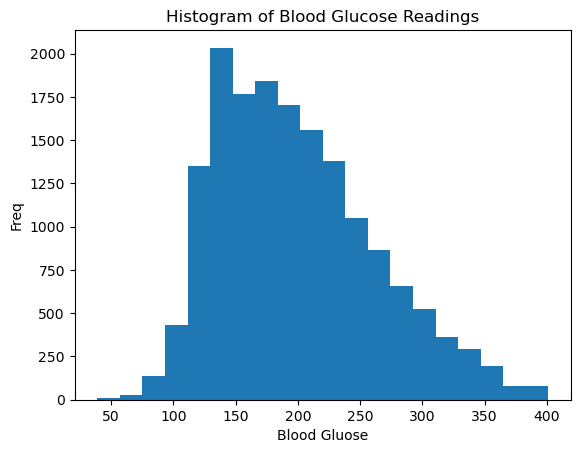

In [183]:
bins=20 #set number of bins
#call the function returning the output to the needed elements
bin_edges, bin_counts = histogram(caleb_merged_df["BG"],bins) 
plt.hist(caleb_merged_df["BG"], bins=bin_edges) #list what we are plotting
plt.xlabel('Blood Gluose') #labeling
plt.ylabel('Freq')
plt.title('Histogram of Blood Glucose Readings')
plt.show() #show the histogram


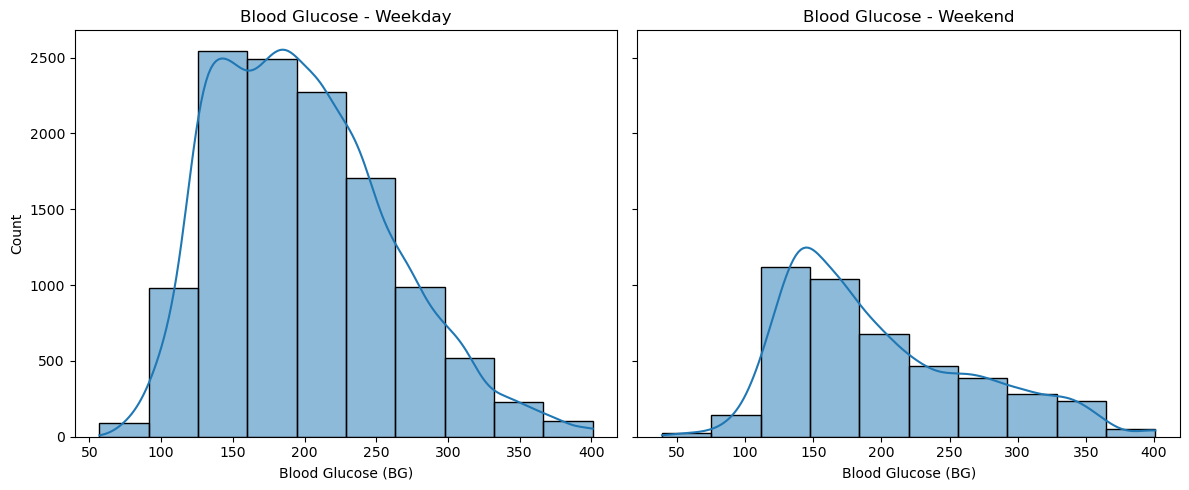

In [184]:
import seaborn as sns

# Unique categories in 'DayType'
categories = caleb_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(caleb_merged_df[caleb_merged_df['DayType'] == category], x='BG', bins=10, kde=True, ax=ax)
    ax.set_title(f'Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

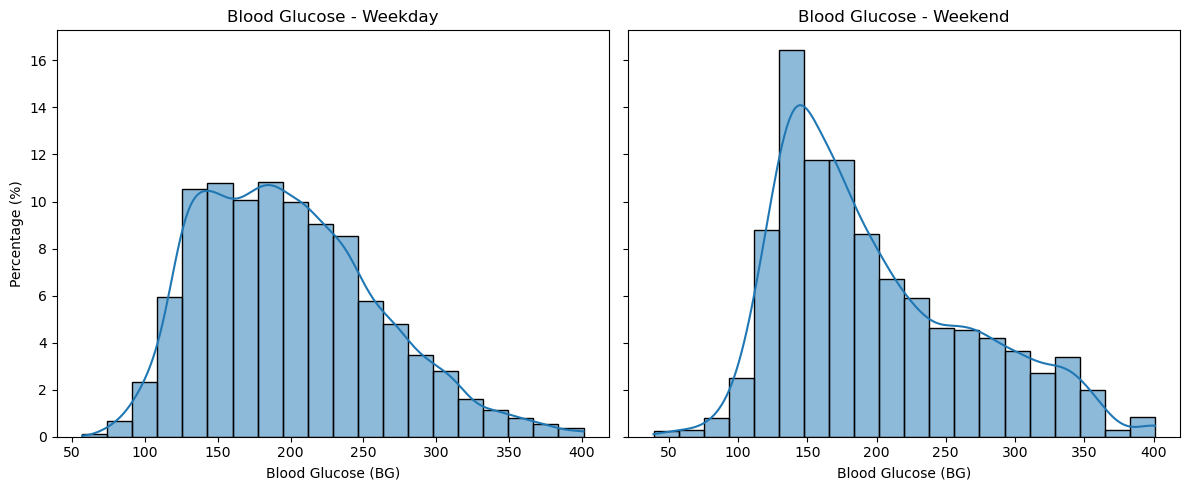

In [186]:
categories = caleb_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(caleb_merged_df[caleb_merged_df['DayType'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

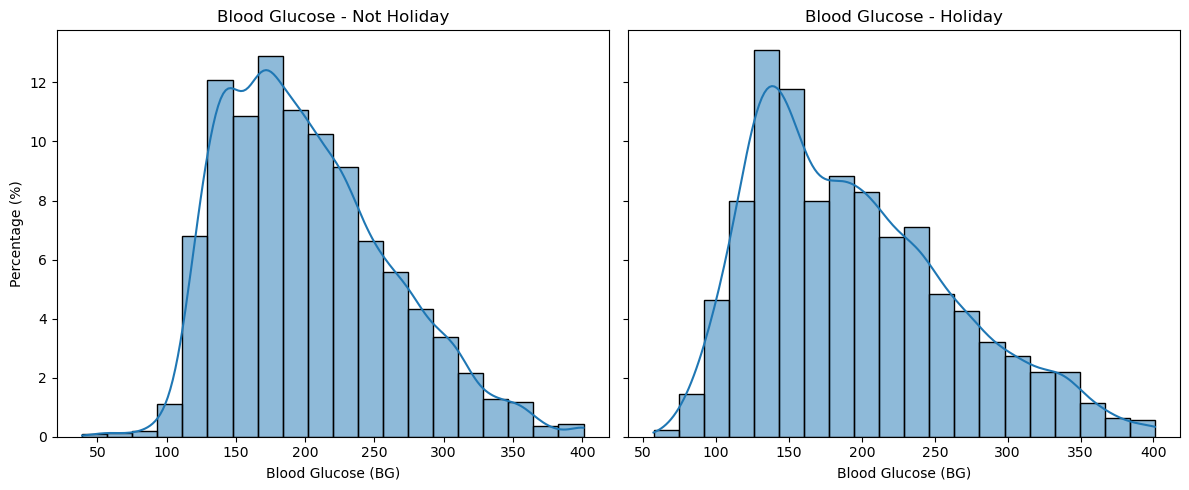

In [185]:
categories = caleb_merged_df['Holiday'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(caleb_merged_df[caleb_merged_df['Holiday'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

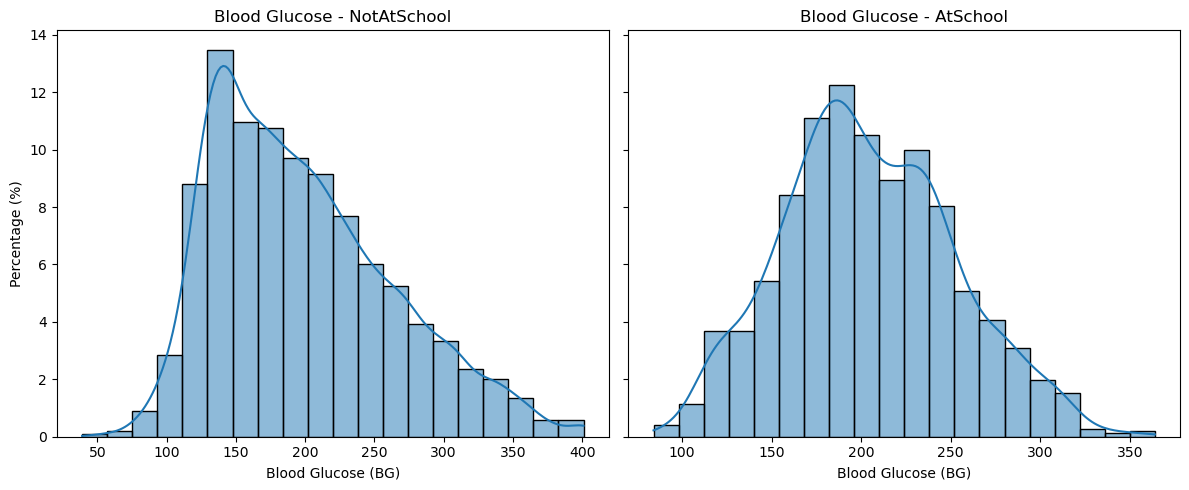

In [187]:
categories = caleb_merged_df['SchoolHours'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(caleb_merged_df[caleb_merged_df['SchoolHours'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [27]:
CalebAtSchool_df = caleb_merged_df[caleb_merged_df["SchoolHours"] == 'AtSchool'] #crate new df with just entries at School


In [28]:
CalebAtHome_df = caleb_merged_df[caleb_merged_df["SchoolHours"] == 'NotAtSchool'] #crate new df with just entries at Home


In [190]:
Caleb_BG_AtSchool_avg = CalebAtSchool_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG at School: {Caleb_BG_AtSchool_avg}")

Average BG at School: 204.14661134163208


In [191]:
Caleb_BG_AtHome_avg = CalebAtHome_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG at Home: {Caleb_BG_AtHome_avg}")

Average BG at Home: 198.23483779971792


In [29]:
Caleb_Weekday_df = caleb_merged_df[caleb_merged_df["DayType"] == 'Weekday'] #crate new df with just entries on Weekdays

In [30]:
Caleb_Weekend_df = caleb_merged_df[caleb_merged_df["DayType"] == 'Weekend'] #crate new df with just entries on Weekend

In [194]:
Caleb_BG_Weekday_avg = Caleb_Weekday_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG on Weekdays: {Caleb_BG_Weekday_avg}")

Average BG on Weekdays: 199.38960167714885


In [195]:
Caleb_BG_Weekend_avg = Caleb_Weekend_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG on Weekend: {Caleb_BG_Weekend_avg}")

Average BG on Weekend: 198.02056962025316


In [31]:
Caleb_Holiday_df = caleb_merged_df[caleb_merged_df["Holiday"] == 'Holiday'] #crate new df with just entries on Holiday

In [32]:
Caleb_NotHoliday_df = caleb_merged_df[caleb_merged_df["Holiday"] == 'Not Holiday'] #crate new df with just entries on Not Holiday

In [198]:
Caleb_BG_Holiday_avg = Caleb_Holiday_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG on Holidays: {Caleb_BG_Holiday_avg}")

Average BG on Holidays: 194.39154616240268


In [199]:
Caleb_BG_Not_Holiday_avg = Caleb_NotHoliday_df["BG"].mean() #directly calculate mean for AtSchool
print(f"Average BG on Not Holidays: {Caleb_BG_Not_Holiday_avg}")


Average BG on Not Holidays: 201.91507557677008


Do Hypothesis tests on Average BG for different daytypes


In [97]:
for var in dir():
    if isinstance(globals()[var], pd.DataFrame):
        print(f"{var}: {globals()[var].shape}")

CalebAtHome_df: (14180, 23)
CalebAtSchool_df: (2169, 23)
Caleb_Holiday_df: (6293, 23)
Caleb_NotHoliday_df: (10056, 23)
Caleb_Weekday_df: (11925, 23)
Caleb_Weekend_df: (4424, 23)
Caleb_X_test: (8175, 17)
Caleb_X_test_scaled: (8175, 9)
Caleb_X_test_selected: (8175, 9)
Caleb_X_test_sm: (8175, 10)
Caleb_X_train: (8174, 17)
Caleb_X_train_scaled: (8174, 9)
Caleb_X_train_scaled_df: (8174, 10)
Caleb_X_train_selected: (8174, 9)
Caleb_X_train_sm: (8174, 10)
Caleb_food_bolus_df: (124, 23)
Food_eaten: (124, 24)
_54: (5, 43)
_68: (20, 10)
_69: (20, 10)
_76: (20, 11)
_77: (20, 11)
__: (20, 11)
___: (20, 10)
caleb_all_df: (16769, 4)
caleb_events_all_df: (784, 14)
caleb_merged_df: (16349, 24)
caleb_merged_df2: (16349, 43)
caleb_mth1_df: (8019, 5)
caleb_mth1_events_df: (401, 20)
caleb_mth2_df: (8750, 5)
caleb_mth2_events_df: (383, 20)
caleb_test: (8175, 43)
caleb_train: (8174, 43)
carb_distribution: (49, 5)
corr_matrix: (10, 10)
total_carbs_per_day: (49, 2)
vif_data: (10, 2)


In [101]:
from scipy.stats import ttest_ind

# Subset BG values based on SchoolHours
BG_AtSchool = CalebAtSchool_df[CalebAtSchool_df["SchoolHours"] == "AtSchool"]["BG"]
BG_NotAtSchool = CalebAtHome_df[CalebAtHome_df["SchoolHours"] == "NotAtSchool"]["BG"]

Caleb_BG_School_avg = BG_AtSchool.mean() #directly calculate mean for AtSchool
print(f"Average BG at School Sample: {Caleb_BG_School_avg}")

Caleb_BG_NotSchool_avg = BG_NotAtSchool.mean() #directly calculate mean for AtSchool
print(f"Average BG Not at School Sample: {Caleb_BG_NotSchool_avg}")

sample_size = 500  #sample size
Caleb_BG_AtSchool_sample = BG_AtSchool.sample(n=sample_size, random_state=65)
Caleb_BG_NotAtSchool_sample = BG_NotAtSchool.sample(n=sample_size, random_state=65)

t_stat_sample, p_value_sample = ttest_ind(Caleb_BG_AtSchool_sample, Caleb_BG_NotAtSchool_sample, equal_var=False)

print(f"Sampled School NotSchool T-statistic: {t_stat_sample:.4f}")
print(f"Sampled School NotSchool P-value: {p_value_sample:.4f}")

Average BG at School Sample: 204.14661134163208
Average BG Not at School Sample: 198.23483779971792
Sampled School NotSchool T-statistic: 3.2741
Sampled School NotSchool P-value: 0.0011


In [102]:
# Subset BG values based on SchoolHours
BG_Weekday = Caleb_Weekday_df[Caleb_Weekday_df["DayType"] == "Weekday"]["BG"]
BG_Weekend = Caleb_Weekend_df[Caleb_Weekend_df["DayType"] == "Weekend"]["BG"]

Caleb_BG_Weekday_avg = BG_Weekday.mean() #directly calculate mean for Weekday
print(f"Average BG at School Sample: {Caleb_BG_Weekday_avg}")

Caleb_BG_Weekend_avg = BG_Weekend.mean() #directly calculate mean for Weekend
print(f"Average BG Not at School Sample: {Caleb_BG_Weekend_avg}")

sample_size = 500  #sample size
Caleb_BG_Weekday_sample = BG_Weekday.sample(n=sample_size, random_state=65)
Caleb_BG_Weekend_sample = BG_Weekend.sample(n=sample_size, random_state=65)

t_stat_sample, p_value_sample = ttest_ind(Caleb_BG_Weekday_sample, Caleb_BG_Weekend_sample, equal_var=False)

print(f"Sampled Weekday Weekend T-statistic: {t_stat_sample:.4f}")
print(f"Sampled Weekday Weekend P-value: {p_value_sample:.4f}")

Average BG at School Sample: 199.38960167714885
Average BG Not at School Sample: 198.02056962025316
Sampled Weekday Weekend T-statistic: 1.4513
Sampled Weekday Weekend P-value: 0.1470


In [259]:
print(caleb_merged_df.dtypes)

Description                     object
BG                               int64
EventDate               datetime64[ns]
RoundedTime             datetime64[ns]
Type                            object
BolusType                       object
BolusDeliveryMethod             object
BGEvent                        float64
InsulinDelivered               float64
FoodDelivered                  float64
CorrectionDelivered            float64
CompletionStatusDesc            object
CarbSize                       float64
Target                         float64
CorrectionFactor               float64
CarbRatio                      float64
DayType                         object
Holiday                         object
EventTimeTimePart               object
SchoolHours                     object
MinTarget                        int64
MaxTarget                        int64
InTarget                        object
dtype: object


In [260]:
caleb_merged_df.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,Target,CorrectionFactor,CarbRatio,DayType,Holiday,EventTimeTimePart,SchoolHours,MinTarget,MaxTarget,InTarget
0,EGV,267,2024-11-20,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:00:00,NotAtSchool,70,150,No
1,EGV,261,2024-11-20,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:05:00,NotAtSchool,70,150,No
2,EGV,256,2024-11-20,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:10:00,NotAtSchool,70,150,No
3,EGV,250,2024-11-20,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:15:00,NotAtSchool,70,150,No
4,EGV,240,2024-11-20,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:20:00,NotAtSchool,70,150,No


In [261]:
caleb_merged_df.describe()

,BG,EventDate,RoundedTime,BGEvent,InsulinDelivered,FoodDelivered,CorrectionDelivered,CarbSize,Target,CorrectionFactor,CarbRatio,MinTarget,MaxTarget
count,16349.000000,16349,16349,774.000000,774.000000,774.000000,774.000000,774.000000,774.0,774.000000,774.000000,16349.0,16349.0
mean,199.019145,2024-12-18 15:17:46.854242048,1900-01-01 11:55:23.983118336,218.439276,4.794432,1.923566,0.269432,8.011628,110.0,18.186047,1.822222,70.0,150.0
min,39.000000,2024-11-20 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,110.0,17.000000,0.000000,70.0,150.0
25%,148.000000,2024-12-04 00:00:00,1900-01-01 05:55:00,192.000000,1.562500,0.000000,0.000000,0.000000,110.0,17.000000,0.000000,70.0,150.0
50%,189.000000,2024-12-19 00:00:00,1900-01-01 11:55:00,222.000000,2.960000,0.000000,0.000000,0.000000,110.0,19.000000,0.000000,70.0,150.0
75%,239.000000,2025-01-02 00:00:00,1900-01-01 17:55:00,264.000000,6.000000,0.000000,0.000000,0.000000,110.0,19.000000,4.000000,70.0,150.0
max,401.000000,2025-01-16 00:00:00,1900-01-01 23:55:00,407.000000,20.000000,20.000000,11.900000,100.000000,110.0,22.000000,4.400000,70.0,150.0
std,63.264038,NaN,NaN,78.474678,4.728170,4.769304,1.076444,20.016710,0.0,1.235110,2.008165,0.0,0.0


In [37]:
#caleb_merged_df['Event_Time'] = caleb_merged_df['EventTime_x'].dt.time

In [38]:
#caleb_merged_df['Bolus_Time'] = caleb_merged_df['EventTime_y'].dt.time

In [262]:
caleb_merged_df.describe()

,BG,EventDate,RoundedTime,BGEvent,InsulinDelivered,FoodDelivered,CorrectionDelivered,CarbSize,Target,CorrectionFactor,CarbRatio,MinTarget,MaxTarget
count,16349.000000,16349,16349,774.000000,774.000000,774.000000,774.000000,774.000000,774.0,774.000000,774.000000,16349.0,16349.0
mean,199.019145,2024-12-18 15:17:46.854242048,1900-01-01 11:55:23.983118336,218.439276,4.794432,1.923566,0.269432,8.011628,110.0,18.186047,1.822222,70.0,150.0
min,39.000000,2024-11-20 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,110.0,17.000000,0.000000,70.0,150.0
25%,148.000000,2024-12-04 00:00:00,1900-01-01 05:55:00,192.000000,1.562500,0.000000,0.000000,0.000000,110.0,17.000000,0.000000,70.0,150.0
50%,189.000000,2024-12-19 00:00:00,1900-01-01 11:55:00,222.000000,2.960000,0.000000,0.000000,0.000000,110.0,19.000000,0.000000,70.0,150.0
75%,239.000000,2025-01-02 00:00:00,1900-01-01 17:55:00,264.000000,6.000000,0.000000,0.000000,0.000000,110.0,19.000000,4.000000,70.0,150.0
max,401.000000,2025-01-16 00:00:00,1900-01-01 23:55:00,407.000000,20.000000,20.000000,11.900000,100.000000,110.0,22.000000,4.400000,70.0,150.0
std,63.264038,NaN,NaN,78.474678,4.728170,4.769304,1.076444,20.016710,0.0,1.235110,2.008165,0.0,0.0


In [263]:
caleb_merged_df.head(100)

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,Target,CorrectionFactor,CarbRatio,DayType,Holiday,EventTimeTimePart,SchoolHours,MinTarget,MaxTarget,InTarget
0,EGV,267,2024-11-20,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:00:00,NotAtSchool,70,150,No
1,EGV,261,2024-11-20,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:05:00,NotAtSchool,70,150,No
2,EGV,256,2024-11-20,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:10:00,NotAtSchool,70,150,No
3,EGV,250,2024-11-20,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:15:00,NotAtSchool,70,150,No
4,EGV,240,2024-11-20,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,00:20:00,NotAtSchool,70,150,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EGV,206,2024-11-20,1900-01-01 08:50:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,08:50:00,AtSchool,70,150,No
106,EGV,203,2024-11-20,1900-01-01 08:55:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,08:55:00,AtSchool,70,150,No
107,EGV,199,2024-11-20,1900-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,09:00:00,AtSchool,70,150,No
109,EGV,192,2024-11-20,1900-01-01 09:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekday,Not Holiday,09:10:00,AtSchool,70,150,No


In [205]:
from tabulate import tabulate

# Get descriptive statistics
desc_stats = caleb_merged_df.describe()

# Convert to tabulated format
table_str = tabulate(desc_stats, headers='keys', tablefmt='grid')

# Save to a text file
with open("descriptive_stats.txt", "w") as f:
    f.write(table_str)

In [206]:
desc_stats.to_csv("descriptive_stats.csv", index=False)

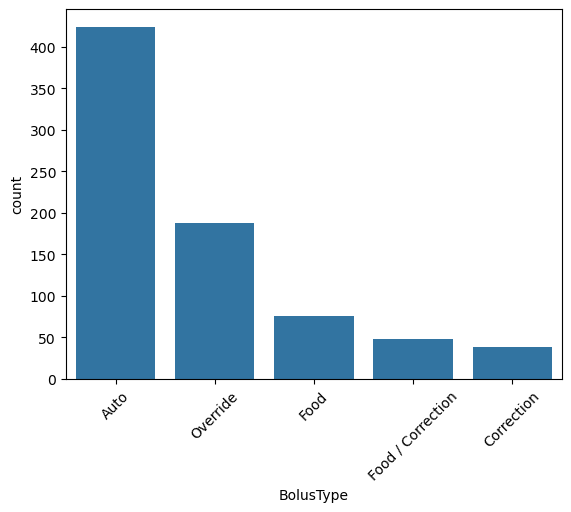

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=caleb_merged_df, x='BolusType')
plt.xticks(rotation=45) 
plt.show()

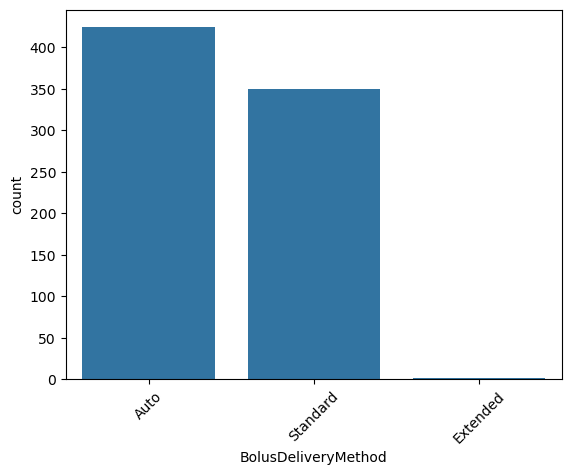

In [208]:
sns.countplot(data=caleb_merged_df, x='BolusDeliveryMethod')
plt.xticks(rotation=45) 
plt.show()

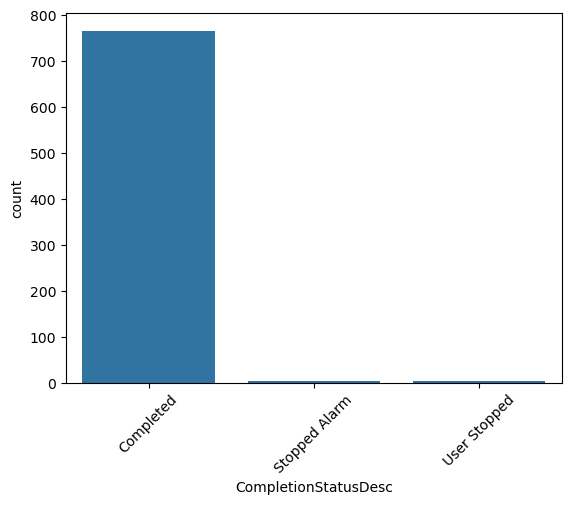

In [209]:
sns.countplot(data=caleb_merged_df, x='CompletionStatusDesc')
plt.xticks(rotation=45) 
plt.show()

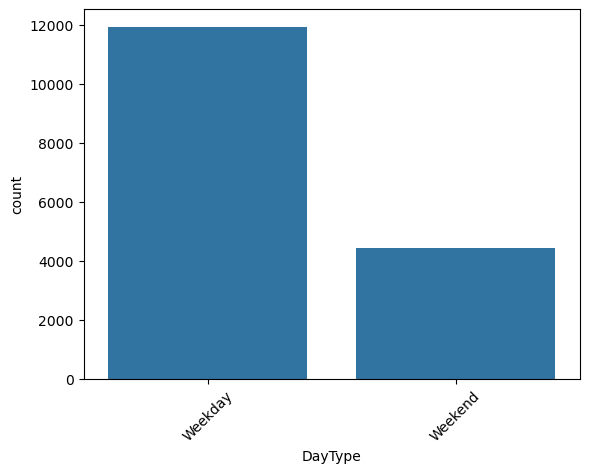

In [210]:
sns.countplot(data=caleb_merged_df, x='DayType')
plt.xticks(rotation=45) 
plt.show()

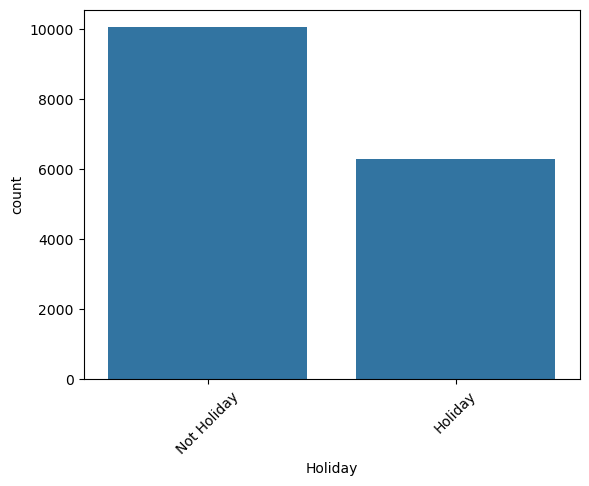

In [211]:
sns.countplot(data=caleb_merged_df, x='Holiday')
plt.xticks(rotation=45) 
plt.show()

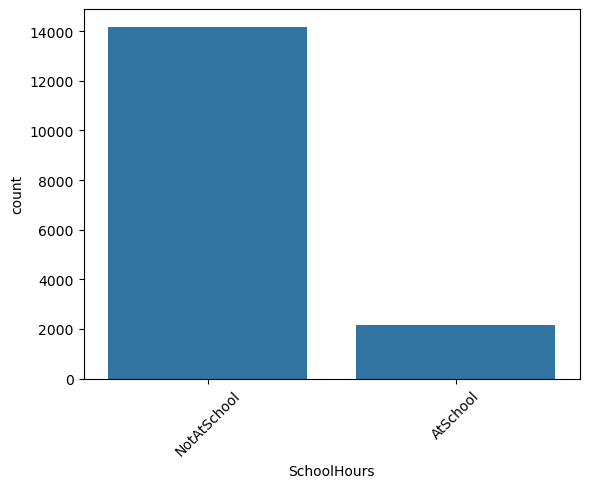

In [212]:
sns.countplot(data=caleb_merged_df, x='SchoolHours')
plt.xticks(rotation=45) 
plt.show()

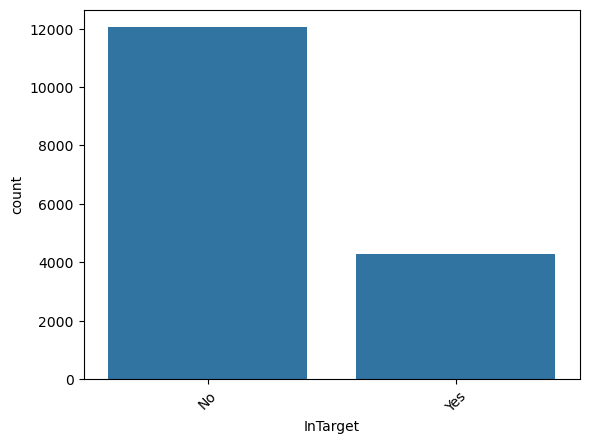

In [213]:
sns.countplot(data=caleb_merged_df, x='InTarget')
plt.xticks(rotation=45) 
plt.show()

In [214]:
for col in ['BolusType', 'BolusDeliveryMethod', 'CompletionStatusDesc','DayType','Holiday','SchoolHours','InTarget']:
    print(f"Frequencies for {col}:")
    print(caleb_merged_df[col].value_counts())
    print("\n")

Frequencies for BolusType:
BolusType
Auto                 424
Override             188
Food                  76
Food / Correction     48
Correction            38
Name: count, dtype: int64


Frequencies for BolusDeliveryMethod:
BolusDeliveryMethod
Auto        424
Standard    349
Extended      1
Name: count, dtype: int64


Frequencies for CompletionStatusDesc:
CompletionStatusDesc
Completed        766
Stopped Alarm      4
User Stopped       4
Name: count, dtype: int64


Frequencies for DayType:
DayType
Weekday    11925
Weekend     4424
Name: count, dtype: int64


Frequencies for Holiday:
Holiday
Not Holiday    10056
Holiday         6293
Name: count, dtype: int64


Frequencies for SchoolHours:
SchoolHours
NotAtSchool    14180
AtSchool        2169
Name: count, dtype: int64


Frequencies for InTarget:
InTarget
No     12049
Yes     4300
Name: count, dtype: int64




In [264]:
caleb_merged_df.to_csv("caleb_merged_df.csv", index=False)

In [267]:
#read back in from this point
caleb_merged_df = pd.read_csv("C:/Users/scott/school/BMI6106/caleb_merged_df.csv")


In [268]:
print(caleb_merged_df.head())

  Description   BG   EventDate          RoundedTime Type BolusType  \
0         EGV  267  2024-11-20  1900-01-01 00:00:00  NaN       NaN   
1         EGV  261  2024-11-20  1900-01-01 00:05:00  NaN       NaN   
2         EGV  256  2024-11-20  1900-01-01 00:10:00  NaN       NaN   
3         EGV  250  2024-11-20  1900-01-01 00:15:00  NaN       NaN   
4         EGV  240  2024-11-20  1900-01-01 00:20:00  NaN       NaN   

  BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  ...  Target  \
0                 NaN      NaN               NaN            NaN  ...     NaN   
1                 NaN      NaN               NaN            NaN  ...     NaN   
2                 NaN      NaN               NaN            NaN  ...     NaN   
3                 NaN      NaN               NaN            NaN  ...     NaN   
4                 NaN      NaN               NaN            NaN  ...     NaN   

  CorrectionFactor  CarbRatio  DayType      Holiday  EventTimeTimePart  \
0              NaN      

In [33]:
import pandas as pd

# Convert EventTimeTimePart to timedelta if not already
caleb_merged_df['EventTimeTimePart'] = pd.to_timedelta(caleb_merged_df['EventTimeTimePart'].astype(str))

# Convert EventDate to datetime
caleb_merged_df['EventDate'] = pd.to_datetime(caleb_merged_df['EventDate'])

# Step 1: Create a new dataframe with only rows where CarbSize > 0
Food_eaten = caleb_merged_df[caleb_merged_df['CarbSize'] > 0].copy()

# Step 2: Aggregate total CarbSize per EventDate
total_carbs_per_day = Food_eaten.groupby('EventDate')['CarbSize'].sum().reset_index()
total_carbs_per_day.rename(columns={'CarbSize': 'TotalCarbs'}, inplace=True)

# Step 3: Define time ranges
def categorize_time_range(time):
    if pd.Timedelta('05:00:00') <= time < pd.Timedelta('10:00:00'):
        return 'Morning (5-10 AM)'
    elif pd.Timedelta('10:00:00') <= time < pd.Timedelta('14:00:00'):
        return 'Midday (10 AM - 2 PM)'
    elif pd.Timedelta('14:00:00') <= time < pd.Timedelta('17:00:00'):
        return 'Afternoon (2-5 PM)'
    elif pd.Timedelta('17:00:00') <= time < pd.Timedelta('22:00:00'):
        return 'Evening (5-10 PM)'
    else:
        return 'Other'

# Apply function to categorize time range
Food_eaten['TimeRange'] = Food_eaten['EventTimeTimePart'].apply(categorize_time_range)

# Step 4: Aggregate total carbs per EventDate and TimeRange
carb_distribution = (
    Food_eaten.groupby(['EventDate', 'TimeRange'])['CarbSize']
    .sum()
    .reset_index()
    .pivot(index='EventDate', columns='TimeRange', values='CarbSize')
    .fillna(0)  # Fill NaN values with 0 for missing time slots
)

# Display results
print(carb_distribution)


TimeRange   Afternoon (2-5 PM)  Evening (5-10 PM)  Midday (10 AM - 2 PM)  \
EventDate                                                                  
2024-11-21                 0.0               50.0                    0.0   
2024-11-22                 0.0               50.0                    0.0   
2024-11-23                 0.0              170.0                    0.0   
2024-11-24                 0.0                0.0                    0.0   
2024-11-26                 0.0                0.0                    0.0   
2024-11-27                 0.0                0.0                   60.0   
2024-11-28               100.0               50.0                    0.0   
2024-11-29                 0.0                0.0                   60.0   
2024-11-30                 0.0              100.0                   80.0   
2024-12-02                 0.0               60.0                    0.0   
2024-12-04                50.0                0.0                    0.0   
2024-12-05  

In [218]:
Food_eaten.to_csv("Food_eaten.csv", index=False)

In [219]:
# Count days where carbs were consumed in each time range
carb_days = (carb_distribution > 0).sum()

# Total number of days in the dataset
total_days = carb_distribution.shape[0]

# Calculate percentage of days with carbs for each time range
percent_days_with_carbs = (carb_days / total_days) * 100

# Display results
print(percent_days_with_carbs)

percent_days_df = pd.DataFrame(percent_days_with_carbs).reset_index()
percent_days_df.columns = ['TimeRange', 'PercentDaysWithCarbs']

# Save to CSV
percent_days_df.to_csv('percent_days_with_carbs.csv', index=False)

# Display the DataFrame
print(percent_days_df)

TimeRange
Afternoon (2-5 PM)       36.734694
Evening (5-10 PM)        63.265306
Midday (10 AM - 2 PM)    38.775510
Morning (5-10 AM)        32.653061
Other                    34.693878
dtype: float64
               TimeRange  PercentDaysWithCarbs
0     Afternoon (2-5 PM)             36.734694
1      Evening (5-10 PM)             63.265306
2  Midday (10 AM - 2 PM)             38.775510
3      Morning (5-10 AM)             32.653061
4                  Other             34.693878


C:\Users\scott\AppData\Local\Temp\ipykernel_39416\775222834.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Time Range")


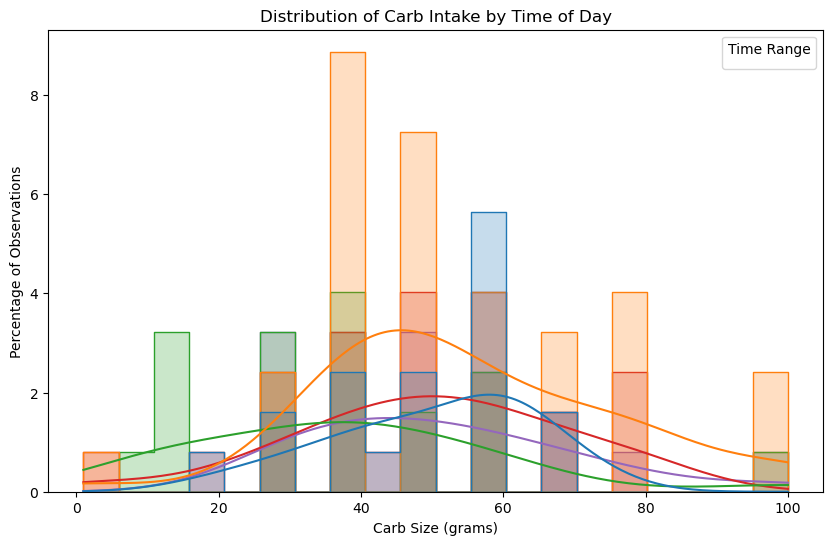

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert data to long format for easier visualization
carb_long = Food_eaten[['EventDate', 'TimeRange', 'CarbSize']]

# Plot histogram with KDE for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(carb_long, x='CarbSize', hue='TimeRange', bins=20, kde=True, element='step', stat="percent")

# Labels and title
plt.xlabel("Carb Size (grams)")
plt.ylabel("Percentage of Observations")
plt.title("Distribution of Carb Intake by Time of Day")
plt.legend(title="Time Range")

# Show the plot
plt.show()


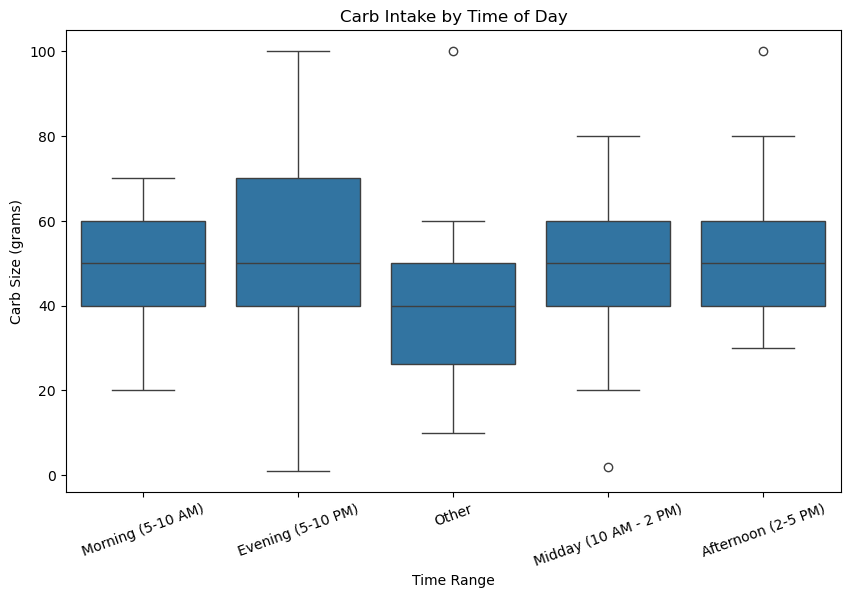

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Food_eaten, x='TimeRange', y='CarbSize')

# Labels and title
plt.xlabel("Time Range")
plt.ylabel("Carb Size (grams)")
plt.title("Carb Intake by Time of Day")
plt.xticks(rotation=20)

# Show the plot
plt.show()


In [221]:
stats = Food_eaten[['BG', 'InsulinDelivered', 'FoodDelivered', 'CorrectionDelivered', 'CarbSize']].describe()

# Display the results
print(stats)

# Save the descriptive stats to a CSV file
stats.to_csv('food_eaten_descriptive_stats.csv', index=False)

               BG  InsulinDelivered  FoodDelivered  CorrectionDelivered  \
count  124.000000        124.000000     124.000000           124.000000   
mean   237.750000         12.787258      12.006774             0.782984   
std     72.983752          4.781641       4.571539             1.553674   
min    107.000000          0.250000       0.250000             0.000000   
25%    178.750000         10.000000       9.990000             0.000000   
50%    245.500000         12.550000      12.400000             0.000000   
75%    278.000000         16.500000      15.000000             0.962500   
max    401.000000         20.000000      20.000000             9.450000   

         CarbSize  
count  124.000000  
mean    50.008065  
std     20.019704  
min      1.000000  
25%     40.000000  
50%     50.000000  
75%     60.000000  
max    100.000000  


In [34]:

# Ensure EventTimeTimePart is a timedelta for proper calculations
caleb_merged_df['EventTimeTimePart'] = pd.to_timedelta(caleb_merged_df['EventTimeTimePart'].astype(str))

# Convert EventDate to datetime for merging
caleb_merged_df['EventDate'] = pd.to_datetime(caleb_merged_df['EventDate'])


In [35]:

# Create a subset of only "Food" BolusType entries
Caleb_food_bolus_df = caleb_merged_df[caleb_merged_df['BolusType'].str.contains('Food', case=False, na=False)].copy()



# Sort both datasets properly (EventDate first, then EventTimeTimePart)
caleb_merged_df = caleb_merged_df.sort_values(['EventDate', 'EventTimeTimePart']).reset_index(drop=True)
Caleb_food_bolus_df = Caleb_food_bolus_df.sort_values(['EventDate', 'EventTimeTimePart']).reset_index(drop=True)


In [272]:
caleb_merged_df.to_csv("caleb_merged_df.csv", index=False)

In [273]:
#read back in from this point
caleb_merged_df = pd.read_csv("C:/Users/scott/school/BMI6106/caleb_merged_df.csv")

In [274]:
print(caleb_merged_df.head())

  Description   BG   EventDate          RoundedTime Type BolusType  \
0         EGV  267  2024-11-20  1900-01-01 00:00:00  NaN       NaN   
1         EGV  261  2024-11-20  1900-01-01 00:05:00  NaN       NaN   
2         EGV  256  2024-11-20  1900-01-01 00:10:00  NaN       NaN   
3         EGV  250  2024-11-20  1900-01-01 00:15:00  NaN       NaN   
4         EGV  240  2024-11-20  1900-01-01 00:20:00  NaN       NaN   

  BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  ...  Target  \
0                 NaN      NaN               NaN            NaN  ...     NaN   
1                 NaN      NaN               NaN            NaN  ...     NaN   
2                 NaN      NaN               NaN            NaN  ...     NaN   
3                 NaN      NaN               NaN            NaN  ...     NaN   
4                 NaN      NaN               NaN            NaN  ...     NaN   

  CorrectionFactor  CarbRatio  DayType      Holiday  EventTimeTimePart  \
0              NaN      

In [246]:
#caleb_merged_df = caleb_merged_df.reset_index()


In [247]:
#print(caleb_merged_df.head())

    BG   EventDate          RoundedTime Type BolusType BolusDeliveryMethod  \
0  267  2024-11-20  1900-01-01 00:00:00  NaN       NaN                 NaN   
1  261  2024-11-20  1900-01-01 00:05:00  NaN       NaN                 NaN   
2  256  2024-11-20  1900-01-01 00:10:00  NaN       NaN                 NaN   
3  250  2024-11-20  1900-01-01 00:15:00  NaN       NaN                 NaN   
4  240  2024-11-20  1900-01-01 00:20:00  NaN       NaN                 NaN   

   BGEvent  InsulinDelivered  FoodDelivered  CorrectionDelivered  ... Target  \
0      NaN               NaN            NaN                  NaN  ...    NaN   
1      NaN               NaN            NaN                  NaN  ...    NaN   
2      NaN               NaN            NaN                  NaN  ...    NaN   
3      NaN               NaN            NaN                  NaN  ...    NaN   
4      NaN               NaN            NaN                  NaN  ...    NaN   

   CorrectionFactor  CarbRatio  DayType      Holid

In [226]:
Caleb_food_bolus_df.to_csv("Caleb_food_bolus_df.csv", index=False)

In [36]:
# Ensure EventDateTime is in datetime format
caleb_merged_df['EventDate'] = pd.to_datetime(caleb_merged_df['EventDate'])

In [37]:
# Extract only the time part from RoundedTime
caleb_merged_df['RoundedTime'] = pd.to_datetime(caleb_merged_df['RoundedTime']).dt.time

In [38]:
# Combine EventDate with RoundedTime
caleb_merged_df['EventDateTime'] = caleb_merged_df.apply(
    lambda row: pd.Timestamp.combine(row['EventDate'], row['RoundedTime']), axis=1
)
print(caleb_merged_df[['EventDate', 'RoundedTime', 'EventDateTime']].head())

   EventDate RoundedTime       EventDateTime
0 2024-11-20    00:00:00 2024-11-20 00:00:00
1 2024-11-20    00:05:00 2024-11-20 00:05:00
2 2024-11-20    00:10:00 2024-11-20 00:10:00
3 2024-11-20    00:15:00 2024-11-20 00:15:00
4 2024-11-20    00:20:00 2024-11-20 00:20:00


In [278]:
print(caleb_merged_df.columns)


Index(['Description', 'BG', 'EventDate', 'RoundedTime', 'Type', 'BolusType',
       'BolusDeliveryMethod', 'BGEvent', 'InsulinDelivered', 'FoodDelivered',
       'CorrectionDelivered', 'CompletionStatusDesc', 'CarbSize', 'Target',
       'CorrectionFactor', 'CarbRatio', 'DayType', 'Holiday',
       'EventTimeTimePart', 'SchoolHours', 'MinTarget', 'MaxTarget',
       'InTarget', 'EventDateTime'],
      dtype='object')


In [39]:
caleb_merged_df2 = caleb_merged_df.copy()


In [40]:
# Calculate rolling metrics
caleb_merged_df2['Avg_BG_2hrs'] = caleb_merged_df2['BG'].rolling(window=24, min_periods=1).mean()


In [41]:
caleb_merged_df2['Sum_Insulin_2hrs'] = caleb_merged_df2['InsulinDelivered'].rolling(window=24, min_periods=1).sum().fillna(0)
caleb_merged_df2['Sum_CarbSize_2hrs'] = caleb_merged_df2['CarbSize'].rolling(window=24, min_periods=1).sum().fillna(0)


In [42]:
from pandas import Timedelta

# Identify rows where InsulinDelivered > 0
insulin_delivered_mask = caleb_merged_df2['InsulinDelivered'] > 0

# Create LastInsulinTime column, setting it only where InsulinDelivered > 0
caleb_merged_df2['LastInsulinTime'] = caleb_merged_df2['EventDateTime'].where(insulin_delivered_mask)

# Initialize first row's LastInsulinTime to EventDateTime - 4 hours
caleb_merged_df2.loc[0, 'LastInsulinTime'] = caleb_merged_df2.loc[0, 'EventDateTime'] - Timedelta(hours=4)

# Forward-fill LastInsulinTime to ensure all rows have a value
caleb_merged_df2['LastInsulinTime'] = caleb_merged_df2['LastInsulinTime'].ffill()

# Compute the time difference in hours
caleb_merged_df2['TimeSinceLastInsulin'] = (caleb_merged_df2['EventDateTime'] - caleb_merged_df2['LastInsulinTime']).dt.total_seconds() / 3600


In [43]:

# Identify rows where FoodDelivered > 0
food_delivered_mask = caleb_merged_df2['FoodDelivered'] > 0

# Create LastFoodTime column, setting it only where FoodDelivered > 0
caleb_merged_df2['LastFoodTime'] = caleb_merged_df2['EventDateTime'].where(food_delivered_mask)

# Initialize first row's LastFoodTime to EventDateTime - 4 hours
caleb_merged_df2.loc[0, 'LastFoodTime'] = caleb_merged_df2.loc[0, 'EventDateTime'] - Timedelta(hours=4)

# Forward-fill LastFoodTime to ensure all rows have a value
caleb_merged_df2['LastFoodTime'] = caleb_merged_df2['LastFoodTime'].ffill()

# Compute the time difference in hours
caleb_merged_df2['TimeSinceLastFood'] = (caleb_merged_df2['EventDateTime'] - caleb_merged_df2['LastFoodTime']).dt.total_seconds() / 3600


In [314]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

In [326]:
print(caleb_merged_df2.dtypes)

Description                        object
BG                                  int64
EventDate                  datetime64[ns]
RoundedTime                        object
Type                               object
BolusType                          object
BolusDeliveryMethod                object
BGEvent                           float64
InsulinDelivered                  float64
FoodDelivered                     float64
CorrectionDelivered               float64
CompletionStatusDesc               object
CarbSize                          float64
Target                            float64
CorrectionFactor                  float64
CarbRatio                         float64
DayType                            object
Holiday                            object
EventTimeTimePart                  object
SchoolHours                        object
MinTarget                           int64
MaxTarget                           int64
InTarget                           object
EventDateTime              datetim

In [286]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

In [44]:
caleb_merged_df2['LikelyMissedRecentBolus'] = (
    ((caleb_merged_df2['TimeSinceLastFood'] > 6) & 
     (caleb_merged_df2['EventDateTime'].dt.time >= pd.to_datetime('10:00:00').time()) & 
     (caleb_merged_df2['EventDateTime'].dt.time <= pd.to_datetime('23:59:59').time()))
    .astype(int)
)


In [317]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

In [45]:
caleb_merged_df2['InBGTarget'] = (
    ((caleb_merged_df2['BG'] > caleb_merged_df2['MinTarget']) & 
     (caleb_merged_df2['BG'] < caleb_merged_df2['MaxTarget']))
    .astype(int)
)


In [46]:
caleb_merged_df2['BG_Delta_15'] = caleb_merged_df2['BG'] - caleb_merged_df2['BG'].shift(3)
caleb_merged_df2['BG_Delta_60'] = caleb_merged_df2['BG'] - caleb_merged_df2['BG'].shift(12)
caleb_merged_df2['BG_Delta_120'] = caleb_merged_df2['BG'] - caleb_merged_df2['BG'].shift(24)

# Fill NaN values (caused by shifting) with 0
caleb_merged_df2[['BG_Delta_15', 'BG_Delta_60', 'BG_Delta_120']] = caleb_merged_df2[['BG_Delta_15', 'BG_Delta_60', 'BG_Delta_120']].fillna(0)


In [47]:
# Create PatientID column with a constant value of 1
caleb_merged_df2['PatientID'] = 1

# Determine the midpoint of the dataset
midpoint = len(caleb_merged_df2) // 2

# Create ObsMonth with 1 for the first half and 2 for the second half
caleb_merged_df2['ObsMonth'] = 1
caleb_merged_df2.loc[midpoint:, 'ObsMonth'] = 2


In [322]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

In [48]:
# Define a column to check if BG is in target range
caleb_merged_df2['FutureInTarget'] = (
    (caleb_merged_df2['BG'] >= caleb_merged_df2['MinTarget']) & 
    (caleb_merged_df2['BG'] <= caleb_merged_df2['MaxTarget'])
).astype(int)


# Create FutureBGInTarget by checking the sum of target-range BG values in the next 12 to 36 rows
caleb_merged_df2['FutureBGInTarget'] = (
    caleb_merged_df2['FutureInTarget']
    .rolling(window=36, min_periods=12)
    .sum()
    .shift(-12)  # Shift to align with the start of the future window
    .ge(13)  # Check if at least 13 values (more than half) are in target
    .astype(int)  # Convert to 1 or 0
)


In [328]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

In [49]:
caleb_merged_df2['Sum_Insulin_1hrs'] = caleb_merged_df2['InsulinDelivered'].rolling(window=12, min_periods=1).sum().fillna(0)
caleb_merged_df2['Sum_Insulin_15min'] = caleb_merged_df2['InsulinDelivered'].rolling(window=3, min_periods=1).sum().fillna(0)

In [50]:
bed_time = pd.to_datetime('23:00:00', format='%H:%M:%S').time()
wake_time = pd.to_datetime('06:30:00', format='%H:%M:%S').time()


In [51]:
# Create Wake hours column based on conditions
# Convert Timedelta to string and extract only the time portion
caleb_merged_df2['EventTimeTimePart'] = caleb_merged_df2['EventTimeTimePart'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')[0]

# Convert extracted time strings to datetime.time
caleb_merged_df2['EventTimeTimePart'] = pd.to_datetime(caleb_merged_df2['EventTimeTimePart'], format='%H:%M:%S').dt.time

caleb_merged_df2['WakeHours'] = caleb_merged_df2.apply(
    lambda obs: 'Awake' if wake_time <= obs['EventTimeTimePart'] <= bed_time else 'Asleep',
    axis=1
)

In [342]:
caleb_merged_df2.to_csv("caleb_merged_df2.csv", index=False)

Data is prepped for Caleb - Section now to do the modeling work

In [52]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [53]:
# **Train-Test Split: First Month (Train), Second Month (Test)**
caleb_train = caleb_merged_df2[caleb_merged_df2["ObsMonth"] == 1]
caleb_test = caleb_merged_df2[caleb_merged_df2["ObsMonth"] == 2]


In [54]:
caleb_train.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,BG_Delta_15,BG_Delta_60,BG_Delta_120,PatientID,ObsMonth,FutureInTarget,FutureBGInTarget,Sum_Insulin_1hrs,Sum_Insulin_15min,WakeHours
0,EGV,267,2024-11-20,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,1,0,0,0.0,0.0,Asleep
1,EGV,261,2024-11-20,00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,1,0,0,0.0,0.0,Asleep
2,EGV,256,2024-11-20,00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,1,0,0,0.0,0.0,Asleep
3,EGV,250,2024-11-20,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-17.0,0.0,0.0,1,1,0,0,0.0,0.0,Asleep
4,EGV,240,2024-11-20,00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-21.0,0.0,0.0,1,1,0,0,0.0,0.0,Asleep


In [420]:
caleb_test.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,BG_Delta_15,BG_Delta_60,BG_Delta_120,PatientID,ObsMonth,FutureInTarget,FutureBGInTarget,Sum_Insulin_1hrs,Sum_Insulin_15min,WakeHours
8174,EGV,234,2024-12-19,09:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,101.0,85.0,1,2,0,0,10.1,0.0,Awake
8175,EGV,228,2024-12-19,09:40:00,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,92.0,81.0,1,2,0,0,10.1,0.0,Awake
8176,EGV,212,2024-12-19,09:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.0,77.0,79.0,1,2,0,0,10.1,0.0,Awake
8177,EGV,208,2024-12-19,09:50:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-26.0,74.0,71.0,1,2,0,0,10.1,0.0,Awake
8178,EGV,209,2024-12-19,09:55:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-19.0,71.0,51.0,1,2,0,0,10.1,0.0,Awake


In [55]:
Caleb_X_train = caleb_train[["BG", "BG_Delta_120", "BG_Delta_60", "BG_Delta_15", "InBGTarget", "LikelyMissedRecentBolus",
                 "TimeSinceLastFood", "TimeSinceLastInsulin", "Sum_CarbSize_2hrs", "Sum_Insulin_2hrs", "Sum_Insulin_1hrs",
                "Sum_Insulin_15min","Avg_BG_2hrs", "SchoolHours","Holiday","DayType","WakeHours"]]


In [56]:
Caleb_X_train = pd.get_dummies(Caleb_X_train, drop_first=True)
print(Caleb_X_train.dtypes)


BG                           int64
BG_Delta_120               float64
BG_Delta_60                float64
BG_Delta_15                float64
InBGTarget                   int32
LikelyMissedRecentBolus      int32
TimeSinceLastFood          float64
TimeSinceLastInsulin       float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Sum_Insulin_15min          float64
Avg_BG_2hrs                float64
SchoolHours_NotAtSchool       bool
Holiday_Not Holiday           bool
DayType_Weekend               bool
WakeHours_Awake               bool
dtype: object


In [57]:
Caleb_Y_train = caleb_train["FutureBGInTarget"]


In [58]:
Caleb_X_test = caleb_test[["BG", "BG_Delta_120", "BG_Delta_60", "BG_Delta_15", "InBGTarget", "LikelyMissedRecentBolus",
                 "TimeSinceLastFood", "TimeSinceLastInsulin", "Sum_CarbSize_2hrs", "Sum_Insulin_2hrs", "Sum_Insulin_1hrs",
                "Sum_Insulin_15min","Avg_BG_2hrs", "SchoolHours","Holiday","DayType","WakeHours"]]


In [59]:
Caleb_X_test = pd.get_dummies(Caleb_X_test, drop_first=True)
print(Caleb_X_test.dtypes)

BG                           int64
BG_Delta_120               float64
BG_Delta_60                float64
BG_Delta_15                float64
InBGTarget                   int32
LikelyMissedRecentBolus      int32
TimeSinceLastFood          float64
TimeSinceLastInsulin       float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Sum_Insulin_15min          float64
Avg_BG_2hrs                float64
SchoolHours_NotAtSchool       bool
Holiday_Not Holiday           bool
DayType_Weekend               bool
WakeHours_Awake               bool
dtype: object


In [60]:
Caleb_Y_test = caleb_test["FutureBGInTarget"]


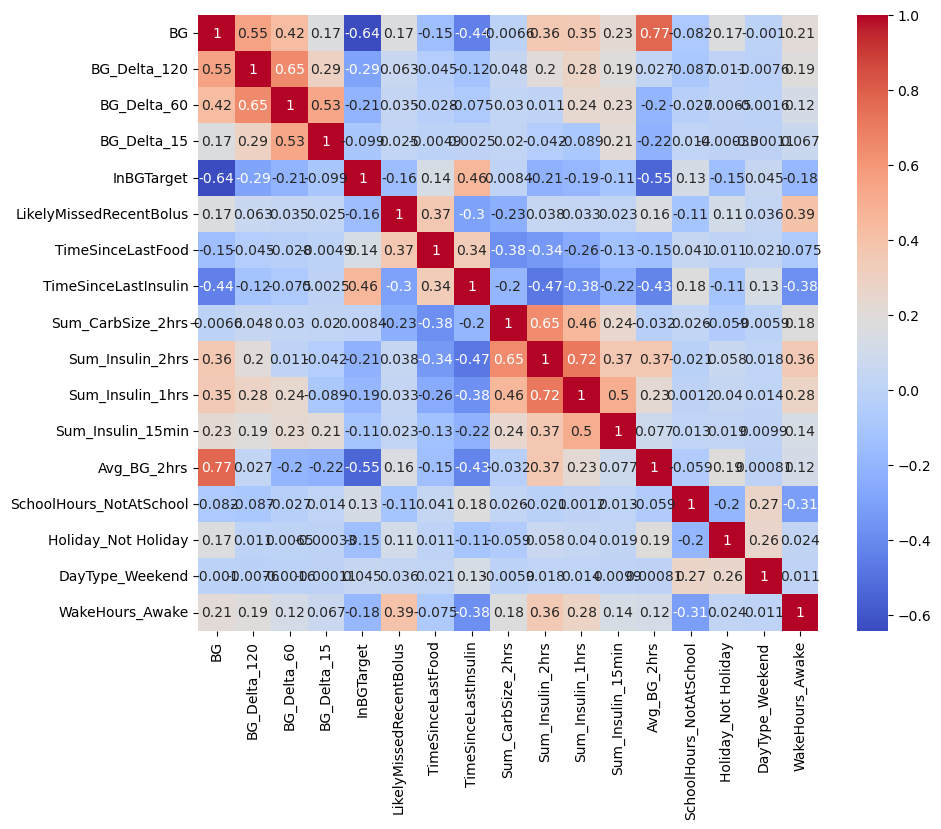

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(Caleb_X_train.corr(), annot=True, cmap="coolwarm")
plt.show()


In [62]:
##this is out of order##
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Caleb_Y_test, Caleb_Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not in Target", "In Target"], yticklabels=["Not in Target", "In Target"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'Caleb_Y_pred' is not defined

In [360]:
#this is out of order##
from sklearn.metrics import classification_report
print(classification_report(Caleb_Y_test, Caleb_Y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5761
           1       0.91      0.87      0.89      2413

    accuracy                           0.94      8174
   macro avg       0.93      0.92      0.93      8174
weighted avg       0.94      0.94      0.94      8174



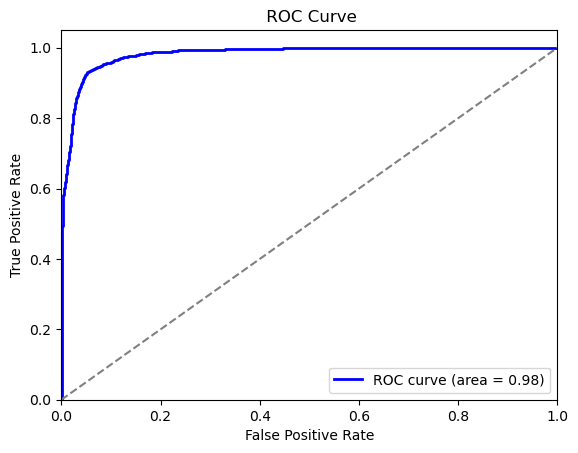

AUC Score: 0.9811


In [361]:
#this is out of order##
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Caleb_Y_test, Caleb_Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.4f}')


In [362]:
##this is out of order##
import numpy as np
feature_importance = pd.DataFrame({'Feature': Caleb_X_train.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print(feature_importance)


                    Feature  Coefficient
4                InBGTarget     1.199085
2               BG_Delta_60     0.814749
9          Sum_Insulin_2hrs     0.606420
10         Sum_Insulin_1hrs     0.485367
3               BG_Delta_15     0.110426
6         TimeSinceLastFood     0.103126
16          WakeHours_Awake     0.071157
15          DayType_Weekend     0.056214
7      TimeSinceLastInsulin     0.049620
11        Sum_Insulin_15min    -0.062674
13  SchoolHours_NotAtSchool    -0.075295
14      Holiday_Not Holiday    -0.092188
5   LikelyMissedRecentBolus    -0.281941
1              BG_Delta_120    -0.332153
8         Sum_CarbSize_2hrs    -0.393293
0                        BG    -1.518502
12              Avg_BG_2hrs    -3.621666


In [363]:
##this is out of order##
import statsmodels.api as sm

# lets do this with statsmodels so we can get p-values on each term
Caleb_X_train_sm = sm.add_constant(Caleb_X_train_scaled)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(Caleb_Y_train, Caleb_X_train_sm)
result = logit_model.fit()

# Print summary (coefficients, p-values, etc.)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.166292
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8174
Model:                          Logit   Df Residuals:                     8156
Method:                           MLE   Df Model:                           17
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.7259
Time:                        22:11:33   Log-Likelihood:                -1359.3
converged:                       True   LL-Null:                       -4959.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4041      0.116    -29.274      0.000      -3.632      -3.176
x1            -1.1345      0.

In [64]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
Caleb_X_train_scaled = scaler.fit_transform(Caleb_X_train)
Caleb_X_test_scaled = scaler.transform(Caleb_X_test)  # Only transform test data (no fitting)

# Convert back to DataFrame to keep feature names
Caleb_X_train_scaled = pd.DataFrame(Caleb_X_train_scaled, columns=Caleb_X_train.columns)
Caleb_X_test_scaled = pd.DataFrame(Caleb_X_test_scaled, columns=Caleb_X_test.columns)

# Now use Caleb_X_train_scaled for the statsmodels regression
Caleb_X_train_sm = sm.add_constant(Caleb_X_train_scaled)
logit_model = sm.Logit(Caleb_Y_train, Caleb_X_train_sm)
result = logit_model.fit()

# Print summary with meaningful variable names
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.166292
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8174
Model:                          Logit   Df Residuals:                     8156
Method:                           MLE   Df Model:                           17
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7259
Time:                        16:26:32   Log-Likelihood:                -1359.3
converged:                       True   LL-Null:                       -4959.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4041      0.116    -29.274      0.000      -3.632   

In [65]:
# List fields that are insignificamnt to drop
drop_these = ['TimeSinceLastInsulin', 'BG_Delta_15','Sum_Insulin_15min','DayType_Weekend','WakeHours_Awake','SchoolHours_NotAtSchool','Holiday_Not Holiday']  

# Drop from both train and test sets
Caleb_X_train_scaled = Caleb_X_train_scaled.drop(columns=drop_these)
Caleb_X_test_scaled = Caleb_X_test_scaled.drop(columns=drop_these)


In [66]:
# Add intercept (constant)
Caleb_X_train_sm = sm.add_constant(Caleb_X_train_scaled)

# Fit model again
logit_model = sm.Logit(Caleb_Y_train, Caleb_X_train_sm)
result = logit_model.fit()

# Print new summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.166829
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8174
Model:                          Logit   Df Residuals:                     8163
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7250
Time:                        16:27:22   Log-Likelihood:                -1363.7
converged:                       True   LL-Null:                       -4959.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4177      0.115    -29.712      0.000      -3.643   

In [67]:
selected_features = ['BG', 'BG_Delta_120','BG_Delta_60','InBGTarget','LikelyMissedRecentBolus','TimeSinceLastFood',
                     'Sum_CarbSize_2hrs','Sum_Insulin_2hrs','Sum_Insulin_1hrs','Avg_BG_2hrs']  # List kept features

Caleb_X_train_selected = Caleb_X_train[selected_features]
Caleb_X_test_selected = Caleb_X_test[selected_features]


In [68]:
Caleb_X_train_selected.head(20)

,BG,BG_Delta_120,BG_Delta_60,InBGTarget,LikelyMissedRecentBolus,TimeSinceLastFood,Sum_CarbSize_2hrs,Sum_Insulin_2hrs,Sum_Insulin_1hrs,Avg_BG_2hrs
0,267,0.0,0.0,0,0,4.000000,0.0,0.0,0.0,267.000000
1,261,0.0,0.0,0,0,4.083333,0.0,0.0,0.0,264.000000
2,256,0.0,0.0,0,0,4.166667,0.0,0.0,0.0,261.333333
3,250,0.0,0.0,0,0,4.250000,0.0,0.0,0.0,258.500000
4,240,0.0,0.0,0,0,4.333333,0.0,0.0,0.0,254.800000
5,239,0.0,0.0,0,0,4.416667,0.0,0.0,0.0,252.166667
6,235,0.0,0.0,0,0,4.500000,0.0,0.0,0.0,249.714286
7,228,0.0,0.0,0,0,4.583333,0.0,0.0,0.0,247.000000
8,221,0.0,0.0,0,0,4.666667,0.0,0.0,0.0,244.111111
9,213,0.0,0.0,0,0,4.750000,0.0,0.0,0.0,241.000000


In [69]:
Caleb_X_test_selected.head(20)

,BG,BG_Delta_120,BG_Delta_60,InBGTarget,LikelyMissedRecentBolus,TimeSinceLastFood,Sum_CarbSize_2hrs,Sum_Insulin_2hrs,Sum_Insulin_1hrs,Avg_BG_2hrs
8174,234,85.0,101.0,0,0,0.500000,40.0,12.60,10.10,161.958333
8175,228,81.0,92.0,0,0,0.583333,40.0,12.60,10.10,165.333333
8176,212,79.0,77.0,0,0,0.666667,40.0,12.60,10.10,168.625000
8177,208,71.0,74.0,0,0,0.750000,40.0,12.60,10.10,171.583333
8178,209,51.0,71.0,0,0,0.833333,40.0,12.60,10.10,173.708333
8179,204,45.0,54.0,0,0,0.916667,40.0,12.60,10.10,175.583333
8180,198,46.0,34.0,0,0,1.000000,40.0,10.10,0.00,177.500000
8181,189,33.0,6.0,0,0,1.083333,40.0,10.10,0.00,178.875000
8182,176,25.0,-31.0,0,0,1.166667,40.0,10.10,0.00,179.916667
8183,170,32.0,-53.0,0,0,1.250000,40.0,10.10,0.00,181.250000


In [70]:
# Fit and transform the training data
scaler = StandardScaler()
Caleb_X_train_scaled = scaler.fit_transform(Caleb_X_train_selected)
Caleb_X_test_scaled = scaler.transform(Caleb_X_test_selected) #transform only, not fitting

In [71]:
# Convert back to DataFrame to keep feature names
Caleb_X_train_scaled = pd.DataFrame(Caleb_X_train_scaled, columns=Caleb_X_train_selected.columns)
Caleb_X_test_scaled = pd.DataFrame(Caleb_X_test_scaled, columns=Caleb_X_test_selected.columns)

# Now use Caleb_X_train_scaled for the statsmodels regression
Caleb_X_train_sm = sm.add_constant(Caleb_X_train_scaled)
logit_model = sm.Logit(Caleb_Y_train, Caleb_X_train_sm)
result = logit_model.fit()

# Print summary with meaningful variable names
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.166829
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8174
Model:                          Logit   Df Residuals:                     8163
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7250
Time:                        16:50:06   Log-Likelihood:                -1363.7
converged:                       True   LL-Null:                       -4959.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4177      0.115    -29.712      0.000      -3.643   

In [72]:
Caleb_Y_train_pred = result.predict(Caleb_X_train_sm)

Caleb_X_test_sm = sm.add_constant(Caleb_X_test_scaled)  # Add intercept to test data
Caleb_Y_test_pred = result.predict(Caleb_X_test_sm)


In [73]:
print(Caleb_X_test_scaled.dtypes)

BG                         float64
BG_Delta_120               float64
BG_Delta_60                float64
InBGTarget                 float64
LikelyMissedRecentBolus    float64
TimeSinceLastFood          float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Avg_BG_2hrs                float64
dtype: object


In [74]:
print(Caleb_X_train_scaled.dtypes)

BG                         float64
BG_Delta_120               float64
BG_Delta_60                float64
InBGTarget                 float64
LikelyMissedRecentBolus    float64
TimeSinceLastFood          float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Avg_BG_2hrs                float64
dtype: object


In [75]:
from sklearn.metrics import accuracy_score

# Predict on the test set
Caleb_Y_test_pred = result.predict(Caleb_X_test_sm)  
Caleb_Y_test_pred_binary = (Caleb_Y_test_pred >= 0.5).astype(int)  # Threshold at 0.5

# compare to train set
Caleb_Y_train_pred = result.predict(Caleb_X_train_sm)  
Caleb_Y_train_pred_binary = (Caleb_Y_train_pred >= 0.5).astype(int)  # Threshold at 0.5

train_accuracy = accuracy_score(Caleb_Y_train, Caleb_Y_train_pred_binary)
test_accuracy = accuracy_score(Caleb_Y_test, Caleb_Y_test_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9399
Test Accuracy: 0.9523


In [76]:
Caleb_X_train_sm.head(20)

,const,BG,BG_Delta_120,BG_Delta_60,InBGTarget,LikelyMissedRecentBolus,TimeSinceLastFood,Sum_CarbSize_2hrs,Sum_Insulin_2hrs,Sum_Insulin_1hrs,Avg_BG_2hrs
0,1.0,1.213049,0.001923,0.001907,-0.558604,-0.733425,-0.893031,-0.326219,-0.76863,-0.551448,1.370739
1,1.0,1.109577,0.001923,0.001907,-0.558604,-0.733425,-0.885127,-0.326219,-0.76863,-0.551448,1.312190
2,1.0,1.023350,0.001923,0.001907,-0.558604,-0.733425,-0.877223,-0.326219,-0.76863,-0.551448,1.260145
3,1.0,0.919878,0.001923,0.001907,-0.558604,-0.733425,-0.869320,-0.326219,-0.76863,-0.551448,1.204848
4,1.0,0.747424,0.001923,0.001907,-0.558604,-0.733425,-0.861416,-0.326219,-0.76863,-0.551448,1.132637
5,1.0,0.730179,0.001923,0.001907,-0.558604,-0.733425,-0.853512,-0.326219,-0.76863,-0.551448,1.081243
6,1.0,0.661198,0.001923,0.001907,-0.558604,-0.733425,-0.845608,-0.326219,-0.76863,-0.551448,1.033381
7,1.0,0.540480,0.001923,0.001907,-0.558604,-0.733425,-0.837704,-0.326219,-0.76863,-0.551448,0.980407
8,1.0,0.419762,0.001923,0.001907,-0.558604,-0.733425,-0.829800,-0.326219,-0.76863,-0.551448,0.924026
9,1.0,0.281800,0.001923,0.001907,-0.558604,-0.733425,-0.821896,-0.326219,-0.76863,-0.551448,0.863307


In [77]:
Caleb_X_test_sm.head(20)

,const,BG,BG_Delta_120,BG_Delta_60,InBGTarget,LikelyMissedRecentBolus,TimeSinceLastFood,Sum_CarbSize_2hrs,Sum_Insulin_2hrs,Sum_Insulin_1hrs,Avg_BG_2hrs
0,1.0,0.643952,1.335125,2.057062,-0.558604,-0.733425,-1.224996,1.770100,1.005566,1.485756,-0.679319
1,1.0,0.540480,1.272386,1.873929,-0.558604,-0.733425,-1.217092,1.770100,1.005566,1.485756,-0.613450
2,1.0,0.264554,1.241017,1.568708,-0.558604,-0.733425,-1.209188,1.770100,1.005566,1.485756,-0.549208
3,1.0,0.195573,1.115539,1.507664,-0.558604,-0.733425,-1.201284,1.770100,1.005566,1.485756,-0.491472
4,1.0,0.212818,0.801844,1.446620,-0.558604,-0.733425,-1.193380,1.770100,1.005566,1.485756,-0.449999
5,1.0,0.126591,0.707736,1.100703,-0.558604,-0.733425,-1.185476,1.770100,1.005566,1.485756,-0.413405
6,1.0,0.023119,0.723420,0.693741,-0.558604,-0.733425,-1.177572,1.770100,0.653543,-0.551448,-0.375998
7,1.0,-0.132089,0.519519,0.123995,-0.558604,-0.733425,-1.169668,1.770100,0.653543,-0.551448,-0.349163
8,1.0,-0.356279,0.394041,-0.628883,-0.558604,-0.733425,-1.161764,1.770100,0.653543,-0.551448,-0.328833
9,1.0,-0.459751,0.503834,-1.076541,-0.558604,-0.733425,-1.153861,1.770100,0.653543,-0.551448,-0.302811


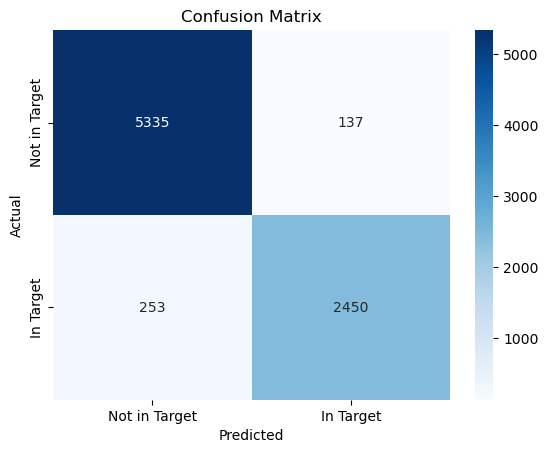

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Caleb_Y_test, Caleb_Y_test_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not in Target", "In Target"], yticklabels=["Not in Target", "In Target"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [443]:
from sklearn.metrics import classification_report
print(classification_report(Caleb_Y_test, Caleb_Y_test_pred_binary))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5472
           1       0.95      0.91      0.93      2703

    accuracy                           0.95      8175
   macro avg       0.95      0.94      0.95      8175
weighted avg       0.95      0.95      0.95      8175



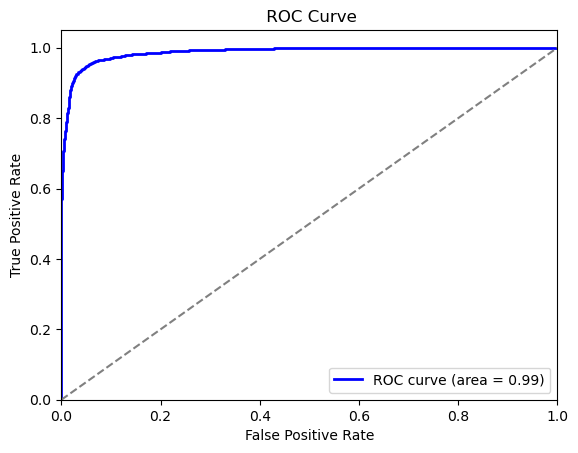

AUC Score: 0.9879


In [79]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Caleb_Y_test, Caleb_Y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.4f}')

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Convert scaled training data back to a DataFrame for easier interpretation
Caleb_X_train_scaled_df = pd.DataFrame(Caleb_X_train_scaled, columns=selected_features)
# Add constant for intercept (like in statsmodels)
Caleb_X_train_scaled_df = sm.add_constant(Caleb_X_train_scaled_df)
# Compute VIF for each feature
vif_data = pd.DataFrame()  # Create an empty DataFrame
vif_data["Feature"] = Caleb_X_train_scaled_df.columns  # Store feature names
vif_data["VIF"] = [variance_inflation_factor(Caleb_X_train_scaled_df.values, i) 
                    for i in range(Caleb_X_train_scaled_df.shape[1])]


In [81]:
print(vif_data)

                    Feature        VIF
0                     const   1.000000
1                        BG  65.518760
2              BG_Delta_120   5.666344
3               BG_Delta_60  15.035590
4                InBGTarget   1.750048
5   LikelyMissedRecentBolus   1.326501
6         TimeSinceLastFood   1.419760
7         Sum_CarbSize_2hrs   2.313365
8          Sum_Insulin_2hrs   3.837121
9          Sum_Insulin_1hrs   2.333799
10              Avg_BG_2hrs  49.286201


In [82]:
import pandas as pd

# List all variables and filter for DataFrames
[var for var in dir() if isinstance(globals()[var], pd.DataFrame)]

['CalebAtHome_df',
 'CalebAtSchool_df',
 'Caleb_Holiday_df',
 'Caleb_NotHoliday_df',
 'Caleb_Weekday_df',
 'Caleb_Weekend_df',
 'Caleb_X_test',
 'Caleb_X_test_scaled',
 'Caleb_X_test_selected',
 'Caleb_X_test_sm',
 'Caleb_X_train',
 'Caleb_X_train_scaled',
 'Caleb_X_train_scaled_df',
 'Caleb_X_train_selected',
 'Caleb_X_train_sm',
 'Caleb_food_bolus_df',
 'Food_eaten',
 '_54',
 '_68',
 '_69',
 '_76',
 '_77',
 '__',
 '___',
 'caleb_all_df',
 'caleb_events_all_df',
 'caleb_merged_df',
 'caleb_merged_df2',
 'caleb_mth1_df',
 'caleb_mth1_events_df',
 'caleb_mth2_df',
 'caleb_mth2_events_df',
 'caleb_test',
 'caleb_train',
 'carb_distribution',
 'total_carbs_per_day',
 'vif_data']

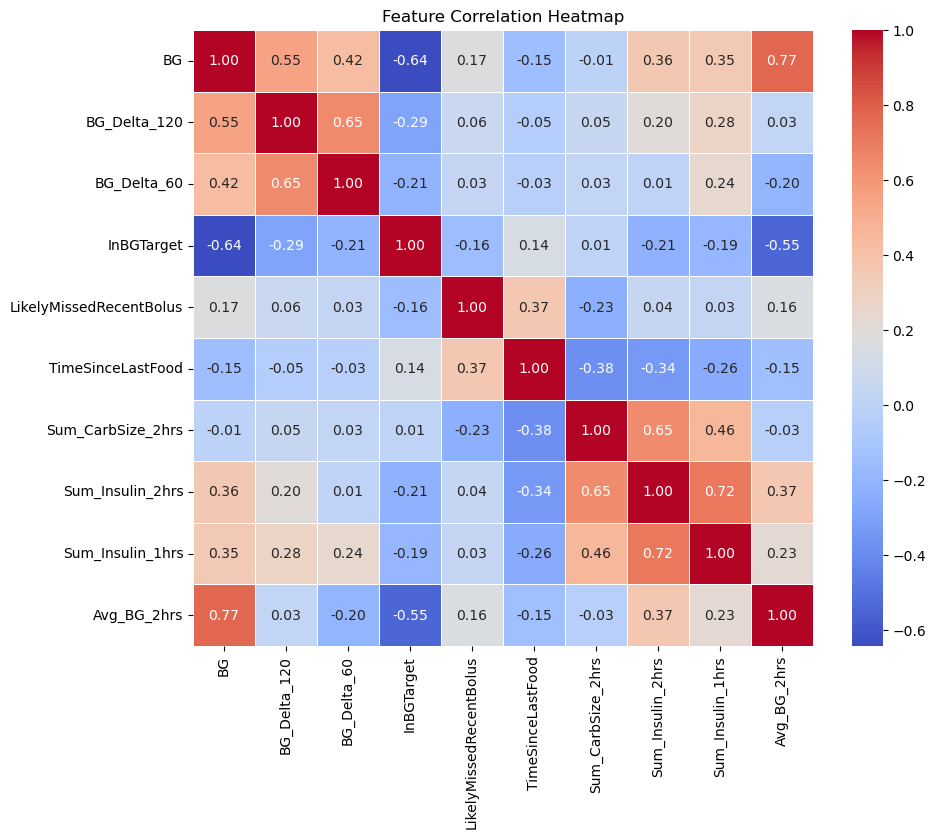

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using the unscaled feature set
corr_matrix = Caleb_X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [84]:
#remove BG as feature
selected_features2 = ['BG_Delta_120','BG_Delta_60','InBGTarget','LikelyMissedRecentBolus','TimeSinceLastFood',
                     'Sum_CarbSize_2hrs','Sum_Insulin_2hrs','Sum_Insulin_1hrs','Avg_BG_2hrs']  # List kept features

Caleb_X_train_selected = Caleb_X_train[selected_features2]
Caleb_X_test_selected = Caleb_X_test[selected_features2]

In [85]:
# Fit and transform the training data
scaler = StandardScaler()
Caleb_X_train_scaled = scaler.fit_transform(Caleb_X_train_selected)
Caleb_X_test_scaled = scaler.transform(Caleb_X_test_selected) #transform only, not fitting

In [86]:
# Convert back to DataFrame to keep feature names
Caleb_X_train_scaled = pd.DataFrame(Caleb_X_train_scaled, columns=Caleb_X_train_selected.columns)
Caleb_X_test_scaled = pd.DataFrame(Caleb_X_test_scaled, columns=Caleb_X_test_selected.columns)

# Now use Caleb_X_train_scaled for the statsmodels regression
Caleb_X_train_sm = sm.add_constant(Caleb_X_train_scaled)
logit_model = sm.Logit(Caleb_Y_train, Caleb_X_train_sm)
result = logit_model.fit()

# Print summary with meaningful variable names
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.167192
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8174
Model:                          Logit   Df Residuals:                     8164
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7244
Time:                        17:06:26   Log-Likelihood:                -1366.6
converged:                       True   LL-Null:                       -4959.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3971      0.114    -29.779      0.000      -3.621   

In [87]:
Caleb_Y_train_pred = result.predict(Caleb_X_train_sm)

Caleb_X_test_sm = sm.add_constant(Caleb_X_test_scaled)  # Add intercept to test data
Caleb_Y_test_pred = result.predict(Caleb_X_test_sm)


In [88]:
from sklearn.metrics import accuracy_score

# Predict on the test set
Caleb_Y_test_pred = result.predict(Caleb_X_test_sm)  
Caleb_Y_test_pred_binary = (Caleb_Y_test_pred >= 0.5).astype(int)  # Threshold at 0.5

# compare to train set
Caleb_Y_train_pred = result.predict(Caleb_X_train_sm)  
Caleb_Y_train_pred_binary = (Caleb_Y_train_pred >= 0.5).astype(int)  # Threshold at 0.5

train_accuracy = accuracy_score(Caleb_Y_train, Caleb_Y_train_pred_binary)
test_accuracy = accuracy_score(Caleb_Y_test, Caleb_Y_test_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9390
Test Accuracy: 0.9528


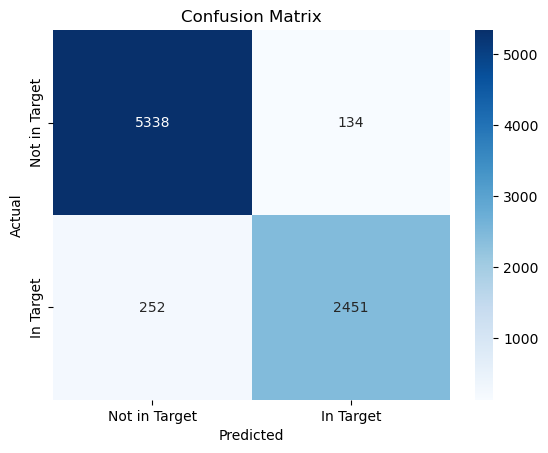

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Caleb_Y_test, Caleb_Y_test_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not in Target", "In Target"], yticklabels=["Not in Target", "In Target"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Caleb_Y_test, Caleb_Y_test_pred_binary))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5472
           1       0.95      0.91      0.93      2703

    accuracy                           0.95      8175
   macro avg       0.95      0.94      0.95      8175
weighted avg       0.95      0.95      0.95      8175



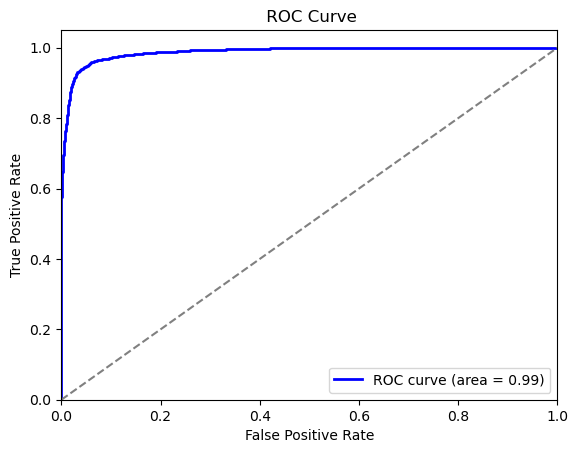

AUC Score: 0.9880


In [91]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Caleb_Y_test, Caleb_Y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.4f}')

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Convert scaled training data back to a DataFrame for easier interpretation
Caleb_X_train_scaled_df = pd.DataFrame(Caleb_X_train_scaled, columns=selected_features2)
# Add constant for intercept (like in statsmodels)
Caleb_X_train_scaled_df = sm.add_constant(Caleb_X_train_scaled_df)
# Compute VIF for each feature
vif_data = pd.DataFrame()  # Create an empty DataFrame
vif_data["Feature"] = Caleb_X_train_scaled_df.columns  # Store feature names
vif_data["VIF"] = [variance_inflation_factor(Caleb_X_train_scaled_df.values, i) 
                    for i in range(Caleb_X_train_scaled_df.shape[1])]


In [95]:
print(Caleb_X_train_scaled_df.isnull().sum())

const                      0
BG_Delta_120               0
BG_Delta_60                0
InBGTarget                 0
LikelyMissedRecentBolus    0
TimeSinceLastFood          0
Sum_CarbSize_2hrs          0
Sum_Insulin_2hrs           0
Sum_Insulin_1hrs           0
Avg_BG_2hrs                0
dtype: int64


In [96]:
print(vif_data)

                   Feature       VIF
0                    const  1.000000
1             BG_Delta_120  1.934679
2              BG_Delta_60  2.182834
3               InBGTarget  1.730678
4  LikelyMissedRecentBolus  1.324022
5        TimeSinceLastFood  1.416753
6        Sum_CarbSize_2hrs  2.313289
7         Sum_Insulin_2hrs  3.834515
8         Sum_Insulin_1hrs  2.312555
9              Avg_BG_2hrs  2.108014


Using separate data file now from Jeff

In [71]:
import csv
import math
import pandas as pd
jeff_mth1_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_wardlejeffrey_901247626_09Mar2025_1826.csv")
jeff_mth2_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_wardlejeffrey_901247626_09Mar2025_1829.csv")


In [72]:
print(jeff_mth1_df.head()) #see what it looks like
print(jeff_mth1_df.dtypes)

  DeviceType  SerialNumber Description        EventDateTime  Readings (mg/dL)
0  t:slim X2     901247626         EGV  2025-02-10T00:01:43               119
1  t:slim X2     901247626         EGV  2025-02-10T00:06:44               113
2  t:slim X2     901247626         EGV  2025-02-10T00:11:42               111
3  t:slim X2     901247626         EGV  2025-02-10T00:16:40               108
4  t:slim X2     901247626         EGV  2025-02-10T00:21:40               105
DeviceType          object
SerialNumber         int64
Description         object
EventDateTime       object
Readings (mg/dL)     int64
dtype: object


In [73]:
jeff_all_df = pd.concat([jeff_mth1_df, jeff_mth2_df], ignore_index=True)
print(jeff_all_df)

      DeviceType  SerialNumber Description        EventDateTime  \
0      t:slim X2     901247626         EGV  2025-02-10T00:01:43   
1      t:slim X2     901247626         EGV  2025-02-10T00:06:44   
2      t:slim X2     901247626         EGV  2025-02-10T00:11:42   
3      t:slim X2     901247626         EGV  2025-02-10T00:16:40   
4      t:slim X2     901247626         EGV  2025-02-10T00:21:40   
...          ...           ...         ...                  ...   
17008  t:slim X2     901247626          BG  2025-02-09T16:27:11   
17009  t:slim X2     901247626          BG  2025-02-09T16:36:54   
17010  t:slim X2     901247626          BG  2025-02-09T16:41:58   
17011  t:slim X2     901247626          BG  2025-02-09T17:31:52   
17012  t:slim X2     901247626          BG  2025-02-09T19:25:40   

       Readings (mg/dL)  
0                   119  
1                   113  
2                   111  
3                   108  
4                   105  
...                 ...  
17008        

In [74]:
# read in pump events data
jeff_mth1_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/JeffWardle_pump_events1_09Mar2025.csv")
jeff_mth2_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/JeffWardle_pump_events1_09Mar2025.csv")
jeff_events_all_df = pd.concat([jeff_mth1_events_df, jeff_mth2_events_df], ignore_index=True)


In [75]:
print(jeff_events_all_df.head()) #see what it looks like

    Type          BolusType BolusDeliveryMethod  BG (mg/dL)  SerialNumber  \
0  Bolus               Auto                Auto         201     901247626   
1  Bolus               Auto                Auto         221     901247626   
2  Bolus  Food / Correction            Standard         245     901247626   
3  Bolus               Auto                Auto         183     901247626   
4  Bolus  Food / Correction            Standard         203     901247626   

    CompletionDateTime  InsulinDelivered  FoodDelivered  CorrectionDelivered  \
0  2025-01-11T08:59:40              1.13           0.00                 0.00   
1  2025-01-11T12:14:43              1.86           0.00                 0.00   
2  2025-01-11T12:43:03             16.00          14.50                 1.49   
3  2025-01-11T15:31:27              0.96           0.00                 0.00   
4  2025-01-11T16:09:45              3.17           2.73                 0.43   

  CompletionStatusDesc  BolexStartDateTime  BolexComplet

In [76]:
jeff_all_df[['EventDate', 'EventTime']] = jeff_all_df['EventDateTime'].str.split('T', expand=True)

jeff_all_df = jeff_all_df.drop(columns=['EventDateTime'])

In [77]:
jeff_events_all_df[['EventDate', 'EventTime']] = jeff_events_all_df['CompletionDateTime'].str.split('T', expand=True)

jeff_events_all_df = jeff_events_all_df.drop(columns=['CompletionDateTime'])

In [78]:
jeff_all_df = jeff_all_df.rename(columns={'Readings (mg/dL)': 'BG'})
jeff_all_df = jeff_all_df.drop(columns=['DeviceType','SerialNumber'])

In [79]:
jeff_events_all_df = jeff_events_all_df.rename(columns={'BG (mg/dL)': 'BGEvent', 'TargetBG (mg/dL)' : 'Target'} )
jeff_events_all_df = jeff_events_all_df.drop(columns=['BolexStartDateTime','SerialNumber','BolexCompletionDateTime','BolexInsulinDelivered',
                                                       'BolexCompletionStatusDesc','StandardPercent','Duration (mins)'])

In [80]:
jeff_all_df['EventDate'] = pd.to_datetime(jeff_all_df['EventDate']) 
jeff_all_df['EventTime'] = pd.to_datetime(jeff_all_df['EventTime'], format='%H:%M:%S')

In [81]:
jeff_events_all_df['EventDate'] = pd.to_datetime(jeff_events_all_df['EventDate']) 
jeff_events_all_df['EventTime'] = pd.to_datetime(jeff_events_all_df['EventTime'], format='%H:%M:%S')

In [82]:
jeff_all_df['RoundedTime'] = jeff_all_df['EventTime'].dt.floor('5min')
jeff_events_all_df['RoundedTime'] = jeff_events_all_df['EventTime'].dt.floor('5min')
jeff_all_df = jeff_all_df.drop(columns=['EventTime'])
jeff_events_all_df = jeff_events_all_df.drop(columns=['EventTime'])

In [83]:
print(jeff_events_all_df.head())

    Type          BolusType BolusDeliveryMethod  BGEvent  InsulinDelivered  \
0  Bolus               Auto                Auto      201              1.13   
1  Bolus               Auto                Auto      221              1.86   
2  Bolus  Food / Correction            Standard      245             16.00   
3  Bolus               Auto                Auto      183              0.96   
4  Bolus  Food / Correction            Standard      203              3.17   

   FoodDelivered  CorrectionDelivered CompletionStatusDesc  CarbSize  Target  \
0           0.00                 0.00            Completed         0     110   
1           0.00                 0.00            Completed         0     110   
2          14.50                 1.49            Completed        80     110   
3           0.00                 0.00            Completed         0     110   
4           2.73                 0.43            Completed        15       0   

   CorrectionFactor  CarbRatio  EventDate         

In [84]:
jeff_events_all_df.to_csv("jeff_events_all_df.csv")

In [85]:
jeff_merged_df = jeff_all_df.merge(jeff_events_all_df, on=['EventDate', 'RoundedTime'],  #merge on these two common columns
    how='left'  #keep all rows from jeff_all_df
)

In [86]:
# Sort by EventDate, RoundedTime, Description (ascending), and Type (descending)
jeff_merged_df = jeff_merged_df.sort_values(
    by=['EventDate', 'RoundedTime', 'Type'], 
    ascending=[True, True, False]
)

# Drop duplicates while keeping the first occurrence in the sorted order
jeff_merged_df = jeff_merged_df.drop_duplicates(
    subset=['EventDate', 'RoundedTime'], 
    keep='first'
)

# Display the deduplicated dataframe
print(jeff_merged_df.head())

     Description   BG  EventDate         EventTime_x         RoundedTime Type  \
8197         EGV  170 2025-01-11 1900-01-01 00:04:04 1900-01-01 00:00:00  NaN   
8198         EGV  164 2025-01-11 1900-01-01 00:09:04 1900-01-01 00:05:00  NaN   
8199         EGV  169 2025-01-11 1900-01-01 00:14:04 1900-01-01 00:10:00  NaN   
8200         EGV  169 2025-01-11 1900-01-01 00:19:04 1900-01-01 00:15:00  NaN   
8201         EGV  164 2025-01-11 1900-01-01 00:24:04 1900-01-01 00:20:00  NaN   

     BolusType BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  \
8197       NaN                 NaN      NaN               NaN            NaN   
8198       NaN                 NaN      NaN               NaN            NaN   
8199       NaN                 NaN      NaN               NaN            NaN   
8200       NaN                 NaN      NaN               NaN            NaN   
8201       NaN                 NaN      NaN               NaN            NaN   

      CorrectionDelivered Comple

In [87]:
jeff_merged_df.to_csv("jeff_merged_df.csv")

In [88]:
print(jeff_merged_df.dtypes)

Description                     object
BG                               int64
EventDate               datetime64[ns]
EventTime_x             datetime64[ns]
RoundedTime             datetime64[ns]
Type                            object
BolusType                       object
BolusDeliveryMethod             object
BGEvent                        float64
InsulinDelivered               float64
FoodDelivered                  float64
CorrectionDelivered            float64
CompletionStatusDesc            object
CarbSize                       float64
Target                         float64
CorrectionFactor               float64
CarbRatio                      float64
EventTime_y             datetime64[ns]
dtype: object


In [89]:
jeff_merged_df['DayType'] = jeff_merged_df['EventDate'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [90]:
# Define a list of jeffs holiday dates
jeff_holiday_dates = ['2025-01-20','2025-02-17']  # Work Holidays
jeff_holiday_dates = pd.to_datetime(jeff_holiday_dates)  # get in right format
print(jeff_holiday_dates)


DatetimeIndex(['2025-01-20', '2025-02-17'], dtype='datetime64[ns]', freq=None)


In [91]:
# Create the Holiday column
jeff_merged_df['Holiday'] = jeff_merged_df['EventDate'].isin(jeff_holiday_dates).map({True: 'Holiday', False: 'Not Holiday'})


In [92]:
# Define work hours range
jeff_start_time = pd.to_datetime('07:00:00', format='%H:%M:%S').time()
jeff_end_time = pd.to_datetime('16:00:00', format='%H:%M:%S').time()
jeff_merged_df['EventTimeTimePart'] = pd.to_datetime(jeff_merged_df['RoundedTime'], format='%H:%M:%S').dt.time

In [93]:
# Create WorkHours column based on conditions
jeff_merged_df['WorkHours'] = jeff_merged_df.apply(
    lambda obs: 'AtWork' if (jeff_start_time <= obs['EventTimeTimePart'] <= jeff_end_time and
        obs['Holiday'] == 'Not Holiday' and obs['DayType'] == 'Weekday') else 'NotAtWork',
    axis=1)

In [94]:
WorkHours_counts = jeff_merged_df['WorkHours'].value_counts()
print(WorkHours_counts)

WorkHours
NotAtWork    12388
AtWork        4111
Name: count, dtype: int64


In [95]:
Holiday_counts = jeff_merged_df['Holiday'].value_counts()
print(Holiday_counts)

Holiday
Not Holiday    15929
Holiday          570
Name: count, dtype: int64


In [96]:
DayType_counts = jeff_merged_df['DayType'].value_counts()
print(DayType_counts)

DayType
Weekday    11407
Weekend     5092
Name: count, dtype: int64


In [97]:
# Create InTarget column based on if blood glucose is in Target range
jeff_merged_df['MinTarget'] = 70
jeff_merged_df['MaxTarget'] = 150

jeff_merged_df['InTarget'] = ((jeff_merged_df['BG'] >= jeff_merged_df['MinTarget']) & 
    (jeff_merged_df['BG'] <= jeff_merged_df['MaxTarget'])).map({True: 'Yes', False: 'No'})


In [102]:
jeff_merged_df.to_csv("jeff_merged_df.csv")

In [98]:
InTarget_counts = jeff_merged_df['InTarget'].value_counts()
print(InTarget_counts)

InTarget
Yes    9783
No     6716
Name: count, dtype: int64


In [99]:
jeff_average_BG = jeff_merged_df["BG"].mean() 
print(jeff_average_BG)

148.54821504333597


In [100]:
jeff_median_BG = jeff_merged_df["BG"].median() 
print(jeff_median_BG)

137.0


In [101]:
import numpy as np

import matplotlib.pyplot as plt
def histogram(somelist, bins): #feed the function the list and bins
    min_val = min(somelist) #calculate min and max values to use in function
    max_val = max(somelist)
    bin_edges = np.linspace(min_val, max_val, bins+1) #use linspace function to get the edges
    bin_counts = np.histogram(somelist, bin_edges) #use histogram function to feed in edges to get counts
    
    return bin_edges, bin_counts #return the arrays needed
    
# call to function
print(histogram(jeff_merged_df["BG"], bins = 20))


(array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ]), (array([  74,  432, 1035, 2110, 3239, 2819, 1927, 1429, 1108,  757,  521,
        406,  245,  154,   91,   31,   16,   19,   20,   66], dtype=int64), array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ])))


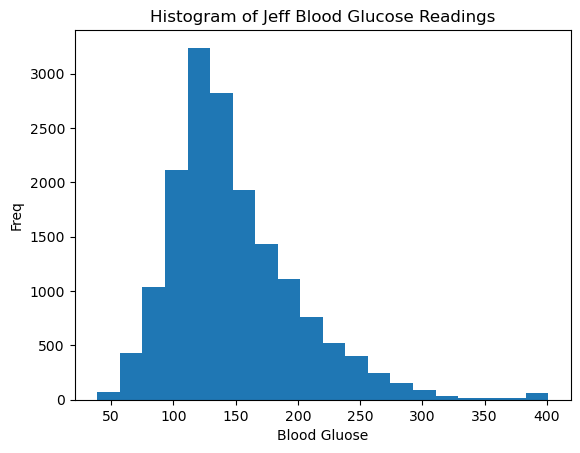

In [38]:
bins=20 #set number of bins
#call the function returning the output to the needed elements
bin_edges, bin_counts = histogram(jeff_merged_df["BG"],bins) 
plt.hist(jeff_merged_df["BG"], bins=bin_edges) #list what we are plotting
plt.xlabel('Blood Gluose') #labeling
plt.ylabel('Freq')
plt.title('Histogram of Jeff Blood Glucose Readings')
plt.show() #show the histogram

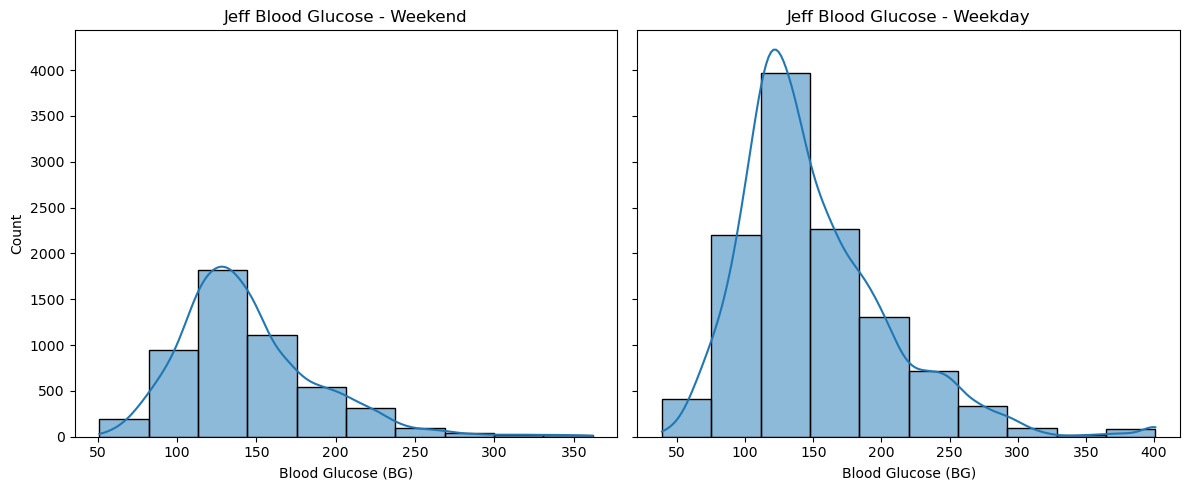

In [39]:
import seaborn as sns

# Unique categories in 'DayType'
categories = jeff_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['DayType'] == category], x='BG', bins=10, kde=True, ax=ax)
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

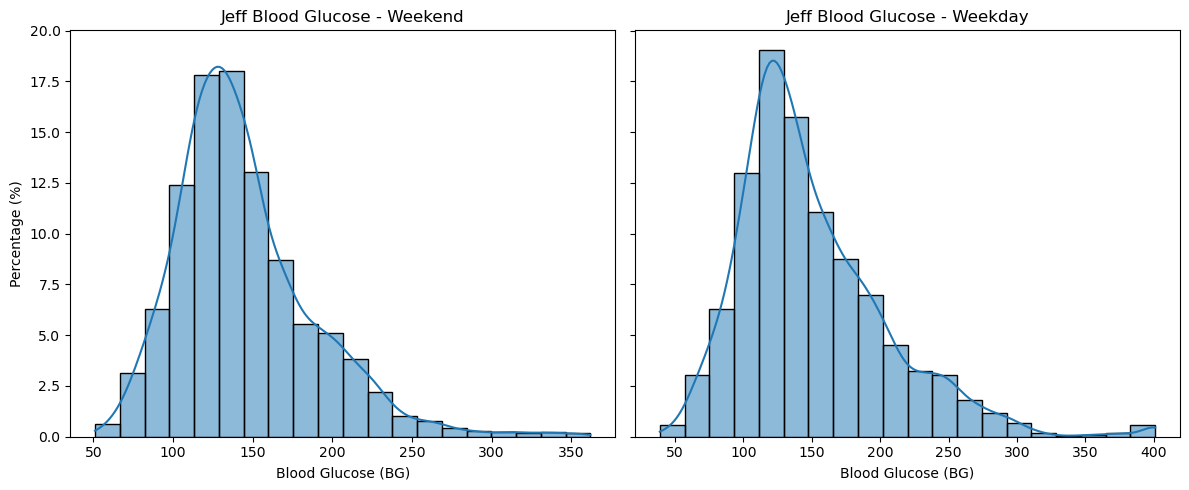

In [40]:
categories = jeff_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['DayType'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

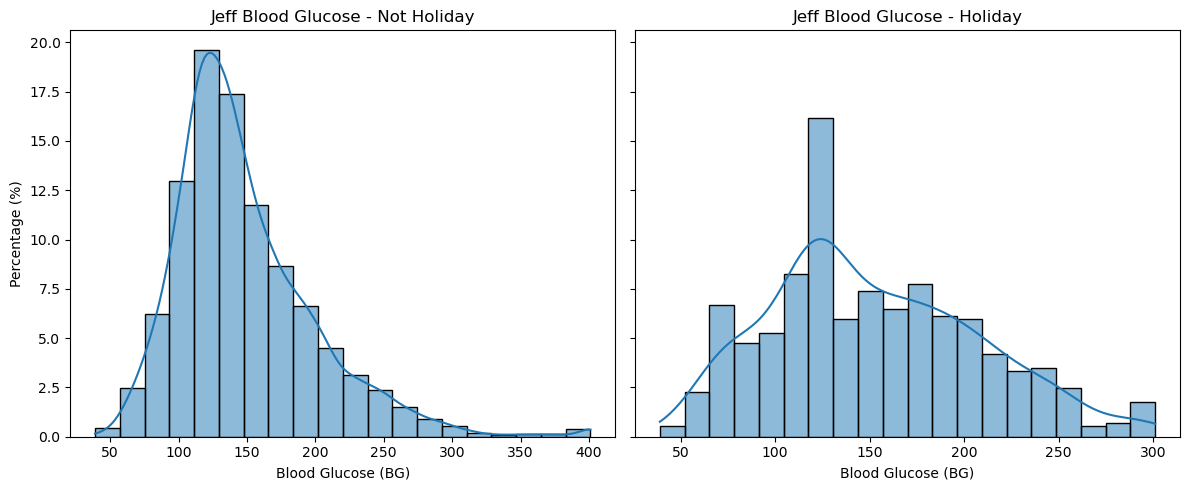

In [41]:
categories = jeff_merged_df['Holiday'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['Holiday'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

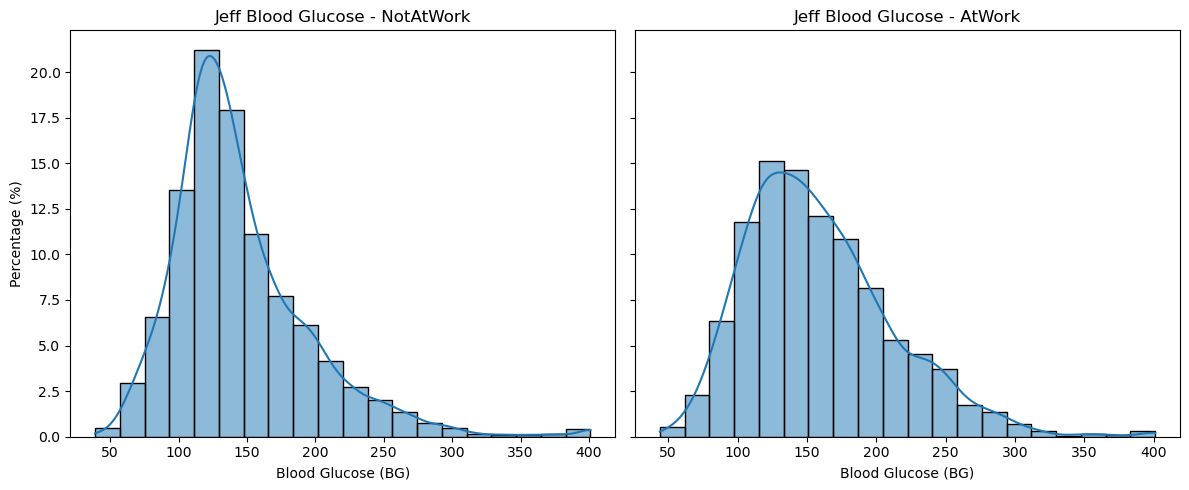

In [42]:
categories = jeff_merged_df['WorkHours'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['WorkHours'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [103]:
JeffAtWork_df = jeff_merged_df[jeff_merged_df["WorkHours"] == 'AtWork'] #crate new df with just entries at Work


In [104]:
JeffAtHome_df = jeff_merged_df[jeff_merged_df["WorkHours"] == 'NotAtWork'] #crate new df with just entries at Home


In [105]:
Jeff_BG_AtWork_avg = JeffAtWork_df["BG"].mean() #directly calculate mean for AtWork
print(f"Average BG at Work: {Jeff_BG_AtWork_avg}")

Average BG at Work: 159.1080029189978


In [106]:
Jeff_BG_AtHome_avg = JeffAtHome_df["BG"].mean() #directly calculate mean for AtHome
print(f"Average BG at Home: {Jeff_BG_AtHome_avg}")

Average BG at Home: 145.0439134646432


In [107]:
Jeff_Weekday_df = jeff_merged_df[jeff_merged_df["DayType"] == 'Weekday'] #crate new df with just entries on Weekdays
Jeff_Weekend_df = jeff_merged_df[jeff_merged_df["DayType"] == 'Weekend'] #crate new df with just entries on Weekend

In [108]:
Jeff_BG_Weekday_avg = Jeff_Weekday_df["BG"].mean() #directly calculate mean for Weekday
print(f"Average BG on Weekdays: {Jeff_BG_Weekday_avg}")

Average BG on Weekdays: 150.24932059261857


In [109]:
Jeff_BG_Weekend_avg = Jeff_Weekend_df["BG"].mean() #directly calculate mean for Weekend
print(f"Average BG on Weekend: {Jeff_BG_Weekend_avg}")

Average BG on Weekend: 144.737431264729


In [110]:
jeff_merged_df.head()

,Description,BG,EventDate,EventTime_x,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,...,CorrectionFactor,CarbRatio,EventTime_y,DayType,Holiday,EventTimeTimePart,WorkHours,MinTarget,MaxTarget,InTarget
8197,EGV,170,2025-01-11,1900-01-01 00:04:04,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,Weekend,Not Holiday,00:00:00,NotAtWork,70,150,No
8198,EGV,164,2025-01-11,1900-01-01 00:09:04,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,Weekend,Not Holiday,00:05:00,NotAtWork,70,150,No
8199,EGV,169,2025-01-11,1900-01-01 00:14:04,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,Weekend,Not Holiday,00:10:00,NotAtWork,70,150,No
8200,EGV,169,2025-01-11,1900-01-01 00:19:04,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,Weekend,Not Holiday,00:15:00,NotAtWork,70,150,No
8201,EGV,164,2025-01-11,1900-01-01 00:24:04,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,Weekend,Not Holiday,00:20:00,NotAtWork,70,150,No


In [111]:
jeff_merged_df.describe()

,BG,EventDate,EventTime_x,RoundedTime,BGEvent,InsulinDelivered,FoodDelivered,CorrectionDelivered,CarbSize,Target,CorrectionFactor,CarbRatio,EventTime_y,MinTarget,MaxTarget
count,16499.000000,16499,16499,16499,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361,16499.0,16499.0
mean,148.548215,2025-02-08 09:23:48.959331072,1900-01-01 11:56:20.421661952,1900-01-01 11:54:04.796654336,208.554017,4.345291,3.620748,0.179723,22.457064,99.335180,36.011080,3.609418,1900-01-01 14:21:40.662050304,70.0,150.0
min,39.000000,2025-01-11 00:00:00,1900-01-01 00:01:08,1900-01-01 00:00:00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01 01:39:39,70.0,150.0
25%,114.000000,2025-01-25 00:00:00,1900-01-01 05:56:28.500000,1900-01-01 05:55:00,182.000000,1.000000,0.000000,0.000000,0.000000,110.000000,36.000000,0.000000,1900-01-01 10:55:41,70.0,150.0
50%,137.000000,2025-02-09 00:00:00,1900-01-01 11:54:49,1900-01-01 11:50:00,202.000000,2.000000,0.670000,0.000000,5.000000,110.000000,36.000000,5.000000,1900-01-01 15:06:40,70.0,150.0
75%,174.000000,2025-02-23 00:00:00,1900-01-01 17:53:58,1900-01-01 17:50:00,230.000000,5.000000,5.000000,0.000000,28.000000,110.000000,46.000000,5.500000,1900-01-01 17:48:42,70.0,150.0
max,401.000000,2025-03-09 00:00:00,1900-01-01 23:59:02,1900-01-01 23:55:00,482.000000,24.300000,23.700000,5.150000,175.000000,110.000000,46.000000,8.000000,1900-01-01 23:23:57,70.0,150.0
std,51.661657,NaN,NaN,NaN,59.485600,5.270121,5.458873,0.496330,35.559949,32.593474,12.584818,3.007365,NaN,0.0,0.0


In [112]:
#read back in from this point
jeff_merged_df = pd.read_csv("C:/Users/scott/school/BMI6106/jeff_merged_df.csv")


In [113]:
jeff_merged_df['Event_Time'] = jeff_merged_df['EventTime_x'].dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [55]:
jeff_merged_df['Bolus_Time'] = jeff_merged_df['EventTime_y'].dt.time

In [56]:
jeff_merged_df.describe()

,BG,EventDate,EventTime_x,RoundedTime,BGEvent,InsulinDelivered,FoodDelivered,CorrectionDelivered,CarbSize,Target,CorrectionFactor,CarbRatio,EventTime_y,MinTarget,MaxTarget
count,16499.000000,16499,16499,16499,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361,16499.0,16499.0
mean,148.548215,2025-02-08 09:23:48.959331072,1900-01-01 11:56:20.421661952,1900-01-01 11:54:04.796654336,208.554017,4.345291,3.620748,0.179723,22.457064,99.335180,36.011080,3.609418,1900-01-01 14:21:40.662050304,70.0,150.0
min,39.000000,2025-01-11 00:00:00,1900-01-01 00:01:08,1900-01-01 00:00:00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900-01-01 01:39:39,70.0,150.0
25%,114.000000,2025-01-25 00:00:00,1900-01-01 05:56:28.500000,1900-01-01 05:55:00,182.000000,1.000000,0.000000,0.000000,0.000000,110.000000,36.000000,0.000000,1900-01-01 10:55:41,70.0,150.0
50%,137.000000,2025-02-09 00:00:00,1900-01-01 11:54:49,1900-01-01 11:50:00,202.000000,2.000000,0.670000,0.000000,5.000000,110.000000,36.000000,5.000000,1900-01-01 15:06:40,70.0,150.0
75%,174.000000,2025-02-23 00:00:00,1900-01-01 17:53:58,1900-01-01 17:50:00,230.000000,5.000000,5.000000,0.000000,28.000000,110.000000,46.000000,5.500000,1900-01-01 17:48:42,70.0,150.0
max,401.000000,2025-03-09 00:00:00,1900-01-01 23:59:02,1900-01-01 23:55:00,482.000000,24.300000,23.700000,5.150000,175.000000,110.000000,46.000000,8.000000,1900-01-01 23:23:57,70.0,150.0
std,51.661657,NaN,NaN,NaN,59.485600,5.270121,5.458873,0.496330,35.559949,32.593474,12.584818,3.007365,NaN,0.0,0.0


In [57]:
from tabulate import tabulate

# Get descriptive statistics
jeff_desc_stats = jeff_merged_df.describe()

# Convert to tabulated format
jeff_table_str = tabulate(jeff_desc_stats, headers='keys', tablefmt='grid')

# Save to a text file
with open("jeff_descriptive_stats.txt", "w") as f:
    f.write(jeff_table_str)

In [58]:
jeff_desc_stats.to_csv("jeff_descriptive_stats.csv")

In [59]:
jeff_merged_df.head()

,Description,BG,EventDate,EventTime_x,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,...,EventTime_y,DayType,Holiday,EventTimeTimePart,WorkHours,MinTarget,MaxTarget,InTarget,Event_Time,Bolus_Time
8197,EGV,170,2025-01-11,1900-01-01 00:04:04,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaT,Weekend,Not Holiday,00:00:00,NotAtWork,70,150,No,00:04:04,NaT
8198,EGV,164,2025-01-11,1900-01-01 00:09:04,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,...,NaT,Weekend,Not Holiday,00:05:00,NotAtWork,70,150,No,00:09:04,NaT
8199,EGV,169,2025-01-11,1900-01-01 00:14:04,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,...,NaT,Weekend,Not Holiday,00:10:00,NotAtWork,70,150,No,00:14:04,NaT
8200,EGV,169,2025-01-11,1900-01-01 00:19:04,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,...,NaT,Weekend,Not Holiday,00:15:00,NotAtWork,70,150,No,00:19:04,NaT
8201,EGV,164,2025-01-11,1900-01-01 00:24:04,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,...,NaT,Weekend,Not Holiday,00:20:00,NotAtWork,70,150,No,00:24:04,NaT


In [1]:
import pandas as pd
import sys


In [2]:
def list_dataframes():
    return [var_name for var_name, var_val in globals().items()
            if isinstance(var_val, pd.DataFrame)]


In [3]:
dataframes_in_memory = list_dataframes()
print("DataFrames currently in memory:", dataframes_in_memory)


DataFrames currently in memory: []


In [60]:
caleb_merged_df.head()

NameError: name 'caleb_merged_df' is not defined